In [2]:
#%pip install openpyxl
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import root_mean_squared_error
import random
import scipy
import glob
import os
from scipy.stats import sem, t
import seaborn as sns

labels_mcd = ['k2',
'k3',
'k4',
'KS',
'KP',
'KN',
'kmenos4']

labels_luci = ['kcat1',
    'kcat2',
    'Km1',
    'Km2',  
    'Tmax', 
    'Ken',  
    'kAOH']

In [3]:
CIs = []
def convert_ci(ci):
    if type(ci) == str:
        ci_list = [float(i) for i in ci.split('_')]
        return ci_list
    else:
        ci_str = str(ci[0]) + '_' + str(ci[1]) + '_' + str(ci[2]) + '_' + str(ci[3])
        return ci_str
def import_dfs():
    # Path to the folder containing CSV files
    folder_path = '../data/'

    # Get a list of all CSV files in the folder
    csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
    # Initialize an empty list to hold dataframes
    data_frames = {}
    names_files = [name.split('\\')[-1].rstrip('.csv') for name in csv_files]

    # Read the first CSV file to establish the schema
    schema = ['ester_mm', 'amox_mm', 'apa_mm', 'aoh_mm','apa_t']
    all_times = []
    # Load each remaining CSV file, reorder columns, and append to the list
    for idx,name in enumerate(names_files):
        df = pd.read_csv(csv_files[idx])  
        print(name)
        df = df[schema]  # Reorder columns to match the schema
        all_times.append(df['apa_t'].to_list())
        ci = df.iloc[0,:4].to_numpy()
        data_frames[name] = df
        CIs.append(convert_ci(ci))
    
    
    return data_frames,names_files,all_times

data_frames,file_list_exp,all_times = import_dfs()

print(data_frames.keys())
print("6-apa initial: ",[convert_ci(ci)[0] for ci in CIs])
print("ester initial: ",[convert_ci(ci)[2] for ci in CIs])
print([len(data_frame) for data_frame in [data_frames[name] for name in file_list_exp]])
print([data_frame['apa_t'].iloc[-1] for data_frame in [data_frames[name] for name in file_list_exp]])


25.45nh60ab20
25.46nh30ab30
25.47nh5ab80
5.100nh40ab80
5.102nh20ab40
5.103nh40ab30
5.106nh100ab40
5.107nh55ab55
5.109nh5ab55
5.110nh10ab55
5.112nh78ab35
5.48nh20ab80
5.80nh12ab40
5.81nh5ab30
nh60ab80
dict_keys(['25.45nh60ab20', '25.46nh30ab30', '25.47nh5ab80', '5.100nh40ab80', '5.102nh20ab40', '5.103nh40ab30', '5.106nh100ab40', '5.107nh55ab55', '5.109nh5ab55', '5.110nh10ab55', '5.112nh78ab35', '5.48nh20ab80', '5.80nh12ab40', '5.81nh5ab30', 'nh60ab80'])
6-apa initial:  [20.0, 30.0, 80.0, 80.0, 40.5, 30.4, 40.038986354775815, 55.0, 55.0, 55.0, 32.5, 80.0, 38.75, 30.0, 80.0]
ester initial:  [60.0, 30.0, 5.0, 40.0, 21.75, 43.0, 100.04518072289156, 55.0, 5.0, 10.0, 78.0, 20.0, 12.0, 5.0, 60.0]
[11, 11, 10, 15, 13, 13, 12, 8, 8, 9, 10, 9, 11, 10, 11]
[490.0, 490.0, 240.0, 600.0, 540.0, 540.0, 360.0, 50.0, 60.0, 60.0, 360.0, 60.0, 410.0, 285.0, 600.0]


In [4]:
Cez = 1


k2 = 187 / 60        # 1/min
k3 = 44 / 60         # 1/min 
k4 = 235 / 60        # 1/min
KS = 0.38 * 1000     # milimolar
KP = 0.095 * 1000    # milimolar
KN = 0.043 * 1000    # milimolar
kmenos4 = 217 / 60   # 1/min

P_mcd = np.zeros(7)
P_mcd[0]   = k2 
P_mcd[1]   = k3    
P_mcd[2]   = k4      
P_mcd[3]   = KS      
P_mcd[4]   = KP     
P_mcd[5]   = KN      
P_mcd[6]   = kmenos4 

Np_mcd = len(P_mcd)
print(P_mcd)

[  3.11666667   0.73333333   3.91666667 380.          95.
  43.           3.61666667]


In [5]:
# luci parameters

kcat1        = 0.178 #Constante catalítica do consumo do éster (mmol/i.u. per min)
 
kcat2        = 0.327 #Constante catalítica da hidrólise da amoxicilina (mmol/i.u. per min)
 
Km1          = 7.905 #Constante de Michaelis-Menten ou constante de afinidade para consumo do éster(mM) 
 
Km2          = 12.509 #Constante de Michaelis-Menten ou constante de afinidade para hidrólise da amoxicilina(mM)
 
Tmax         = 0.606 #Taxa de conversão máxima do complexo acil-enzima-núcleo em produto
 
Ken          = 14.350 #Constante de adsorção do 6-APA
 
kAB          = 3.78 #Constante de inibição do éster (POHPGME)(mM)
 
kAN          = 9.174 #Constante de inibição da amoxicilina (mM)
 
kAOH         = 10.907 #Constante de inibição do POHPG, produto da hidr�lise da amoxicilina (mM)
 
kNH          = 62.044 #Constante de inibição do 6-APA

P_luci = np.zeros(7)
P_luci[0]   = kcat1    
P_luci[1]   = kcat2    
P_luci[2]   = Km1      
P_luci[3]   = Km2      
P_luci[4]   = Tmax     
P_luci[5]   = Ken      
P_luci[6]   = kAOH  

Np_luci = len(P_luci)
print(P_luci)

[ 0.178  0.327  7.905 12.509  0.606 14.35  10.907]


In [6]:
def mcd_model(t,y, 
k2,
k3,
k4,
KS,
KP,
KN,
kmenos4,
):
    Cez = 1
    CAB = y[0]
    CAN = y[1]
    CNH = y[2]
    CAOH = y[3]

    # fixed parameter
    k5 = 0.150

    RP = (Cez)/(k3 * KN + k4 * CNH + k5 * CNH) * (((k2 * k4 * CAB * CNH)/ (KS)) - ((kmenos4 * CAN * (k3 * KN + k5 * CNH))/KP))
    RB = (Cez * (k3 * KN + k5 * CNH) / (k3 * KN + k4 * CNH + k5 * CNH)) * (((k2 * CAB)/KS) - ((kmenos4 * CAN) / KP))
    RS = -(RP + RB)
    RNu = -(RP)

    dy = np.zeros(4)

    dy[0] =  RS    #  Ester  
    dy[1] =  RP    #  Amox
    dy[2] =  -(RP)    # 6-APA
    dy[3] = RB     #  AOh
    
    return np.array(dy)

In [7]:
def luci_model(t,y, 
kcat1,
kcat2,
Km1,
Km2,  
Tmax, 
Ken,    
kAOH):
    FAB = 0
    FNH = 0 
    
    CAB = y[0]
    CAN = y[1]
    CNH = y[2]
    CAOH = y[3]


    # parametros fixados
    kAB          = 3.78 #Constante de inibição do éster (POHPGME)(mM)
    kAN          = 9.174 #Constante de inibição da amoxicilina (mM)
    kAOH         = 10.907 #Constante de inibição do POHPG, produto da hidr�lise da amoxicilina (mM)
    kNH          = 62.044 #Constante de inibição do 6-APA

    Cez = 1

    # Consumo de ester
    VAB = (kcat1*CAB*Cez)/((Km1*(1 + (CAN/kAN) + (CAOH/kAOH))) + CAB)
    
    # Hidrolise de amoxicilina
    VAN = (kcat2*CAN*Cez)/((Km2*(1 + (CAB/kAB) + (CNH/kNH) + (CAOH/kAOH))) + CAN)
    
    # Enzima saturada com 6-apa
    X   = CNH/(Ken + CNH)
    
    # Sintese enzimatica
    VS  = VAB*Tmax*X

    # Hidrolise de ester
    Vh1 = (VAB - VS) 

    dy = np.zeros(4)

    # C. ester
    dy[0] = ((-(VS - VAN) - (Vh1 + VAN)) + FAB) 
    
    # C. amox
    dy[1] = (VS - VAN)                         
    
    # C. 6-apa
    dy[2] = (-(VS - VAN) + FNH)                
    
    # C. POHPG
    dy[3] =  (Vh1 + VAN)
    
    return np.array(dy)   

In [8]:
# ODE15s solver
def ode15s_amox(P, CI, t, model):
    try:
        sol = scipy.integrate.solve_ivp(
            model, 
            t_span=(t[0], t[-1]), 
            t_eval=t, 
            y0=CI, 
            method='BDF', 
            args=P, 
            #atol=1e-8, 
            #tol=1e-6
        )
        if sol.status != 0:
            raise ValueError("ODE solver failed to converge")
        return sol.y.T
    except Exception as e:
        print(P)
        print(f"Solver failed with error: {e}")
        # Handle solver failure (e.g., return NaNs or retry with different parameters)
        return np.full((len(CI), len(t)), np.nan).T

In [9]:
def import_dfs(N,model):
    # Path to the folder containing CSV files
    if model == 'mcd':
        folder_path = '../results/model_donald'
    elif model == 'luci':
        folder_path = '../results/model_luci_single_rep'
    else:
        raise SyntaxError('Use mcd or luci as model')
    # Get a list of all CSV files in the folder
    csv_files = glob.glob(os.path.join(folder_path,'par_adj', f'*{N}_*mean.csv'))
    # Initialize an empty list to hold dataframes
    data_frames_imp = []
    # Read the first CSV file to establish the schema
    if model == 'mcd':
        schema = ['k2',
              'k3',
              'k4',
              'KS',
              'KP',
              'KN',
              'kmenos4'
             ]
    else:
        schema = ['kcat1',
    'kcat2',
    'Km1',
    'Km2',  
    'Tmax', 
    'Ken',   
    'kAOH']

    # Load each remaining CSV file, reorder columns, and append to the list
    for file in csv_files:
        df = pd.read_csv(file)  
        
        df = df[schema]  # Reorder columns to match the schema
        data_frames_imp.append(df)
    
    csv_files = [name.split('\\')[-1].rstrip('.csv') for name in csv_files]
    print(csv_files)
    return data_frames_imp,csv_files

data_frames_chains_mcd_50k,file_list_mcd_50k = import_dfs(50000,'mcd')
data_frames_chains_luci_50k,file_list_luci_50k = import_dfs(50000,'luci')

data_frames_chains_mcd_100k,file_list_mcd_100k = import_dfs(100000,'mcd')
data_frames_chains_luci_100k,file_list_luci_100k = import_dfs(100000,'luci')

['0_50000_donald_mean', '1_50000_donald_mean', '2_50000_donald_mean']
['0_50000_luci_adj_mean', '1_50000_luci_adj_mean', '2_50000_luci_adj_mean']
['0_100000_donald_mean', '1_100000_donald_mean', '2_100000_donald_mean']
['0_100000_luci_adj_mean']


In [10]:
ensaios_dfs_mcd_50k = {}
for assay in file_list_exp:
    ensaios_dfs_mcd_50k[assay] = pd.DataFrame(data=np.zeros((len(data_frames_chains_mcd_50k),data_frames_chains_mcd_50k[0].shape[1])),index=file_list_mcd_50k,columns=labels_mcd)

for idx,df in enumerate(data_frames_chains_mcd_50k):
    for row in df.index:
        ensaios_dfs_mcd_50k[file_list_exp[row]].loc[file_list_mcd_50k[idx],:] = df.iloc[row]

ensaios_dfs_mcd_100k = {}
for assay in file_list_exp:
    ensaios_dfs_mcd_100k[assay] = pd.DataFrame(data=np.zeros((len(data_frames_chains_mcd_100k),data_frames_chains_mcd_100k[0].shape[1])),index=file_list_mcd_100k,columns=labels_mcd)

for idx,df in enumerate(data_frames_chains_mcd_100k):
    for row in df.index:
        ensaios_dfs_mcd_100k[file_list_exp[row]].loc[file_list_mcd_100k[idx],:] = df.iloc[row]

ensaios_dfs_luci_50k = {}
for assay in file_list_exp:
    ensaios_dfs_luci_50k[assay] = pd.DataFrame(data=np.zeros((len(data_frames_chains_luci_50k),data_frames_chains_luci_50k[0].shape[1])),index=file_list_luci_50k,columns=labels_luci)

for idx,df in enumerate(data_frames_chains_luci_50k):
    for row in df.index:
        ensaios_dfs_luci_50k[file_list_exp[row]].loc[file_list_luci_50k[idx],:] = df.iloc[row]

ensaios_dfs_luci_100k = {}
for assay in file_list_exp:
    ensaios_dfs_luci_100k[assay] = pd.DataFrame(data=np.zeros((len(data_frames_chains_luci_100k),data_frames_chains_luci_100k[0].shape[1])),index=file_list_luci_100k,columns=labels_luci)

for idx,df in enumerate(data_frames_chains_luci_100k):
    for row in df.index:
        ensaios_dfs_luci_100k[file_list_exp[row]].loc[file_list_luci_100k[idx],:] = df.iloc[row]


In [11]:
best_luci_path = '..\\results\\pickles\\model_luci_single_rep\\0_50000_luci_adj_5.100nh40ab80_adj.npz'
best_mcd_path = '..\\results\\pickles\\donald\\0_50000_donald_5.112nh78ab35_adj.npz'

In [12]:
data_mcd = np.load(best_mcd_path)
data_mcd = data_mcd['arr_0']
data_luci = np.load(best_luci_path)
data_luci = data_luci['arr_0']

# plot functions

In [13]:

def plot_distributions(data, title='Distribution of Values', 
                       figsize=(15, 10), 
                       palette='viridis'):
    """
    Plot distributions for multiple columns in separate subplots.
    
    Parameters:
    -----------
    data : numpy.ndarray
        2D numpy array with shape (n_samples, n_features)
    title : str, optional
        Base title of the plot (default is 'Distribution of Values')
    figsize : tuple, optional
        Figure size (width, height) in inches (default is (15, 10))
    palette : str, optional
        Color palette for the distributions (default is 'viridis')
    
    Returns:
    --------
    tuple of (matplotlib.figure.Figure, matplotlib.axes.Axes)
        The created figure and axes objects
    """
    # Validate input
    if not isinstance(data, np.ndarray) or data.ndim != 2:
        raise ValueError("Input must be a 2D numpy array")
    
    # Create a figure with 3 rows and as many columns as needed for the distributions
    n_cols = data.shape[1]
    fig, axes = plt.subplots(nrows=3, ncols=n_cols, figsize=figsize)
    fig.suptitle(title, fontsize=16)
    
    # Flatten axes for easier indexing if there's only one column
    if n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    # Color generation
    colors = plt.cm.get_cmap(palette)(np.linspace(0, 1, n_cols))
    
    # Plot types
    plot_functions = [
        ('KDE Plot', sns_kde_plot),
        ('Box Plot', box_plot),
        ('Violin Plot', violin_plot)
    ]
    
    # Iterate through plot types and columns
    for row, (plot_name, plot_func) in enumerate(plot_functions):
        for col in range(n_cols):
            ax = axes[row, col]
            plot_func(data[:, col], ax, colors[col], f'Column {col+1}')
            ax.set_title(f'{plot_name} - Column {col+1}')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    return fig, axes

def sns_kde_plot(data, ax, color, label):
    """Kernel Density Estimation plot"""
    sns.kdeplot(data, ax=ax, fill=True, alpha=0.5, color=color, label=label)
    ax.legend()

def box_plot(data, ax, color, label):
    """Box plot"""
    sns.boxplot(x=data, ax=ax, color=color)
    ax.set_xlabel(label)

def violin_plot(data, ax, color, label):
    """Violin plot"""
    sns.violinplot(x=data, ax=ax, color=color)
    ax.set_xlabel(label)

    

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def detailed_residual_analysis(P, model, eval_set, data_frames):
    """
    Perform comprehensive residual analysis for the chemical model
    
    Parameters:
    -----------
    P : numpy.ndarray
        Parameter set
    model : function
        ODE model function
    eval_set : list
        List of experiment names to evaluate
    data_frames : dict
        Dictionary of experimental dataframes
    
    Returns:
    --------
    dict containing residual analysis results
    """
    # Output names
    x_names = ['ester_mm', 'amox_mm', 'apa_mm', 'aoh_mm']
    
    # Prepare figure for residual plots
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    axes = axes.flatten()
    
    # Prepare results storage
    residual_analysis_results = {
        'residuals': {},
        'statistical_tests': {}
    }
    
    # Iterate through each output variable
    for idx, var_name in enumerate(x_names):
        # Collect residuals for this variable across all experiments
        all_residuals = []
        all_predicted = []
        all_actual = []
        
        # Iterate through experiments
        for exp_name in eval_set:
            # Get target data
            x_target = data_frames[exp_name].loc[:, x_names].to_numpy()
            t_target = data_frames[exp_name]['apa_t'].to_numpy()
            
            # Initial conditions
            ic = x_target[0]
            
            # Model simulation
            sol_val = ode15s_amox(P, ic, t_target, model)
            x_model = sol_val
            
            # Residuals for this specific variable
            residuals = x_target[:, idx] - x_model[:, idx]
            
            # Collect data
            all_residuals.extend(residuals)
            all_predicted.extend(x_model[:, idx])
            all_actual.extend(x_target[:, idx])
        
        # Convert to numpy arrays
        all_residuals = np.array(all_residuals)
        all_predicted = np.array(all_predicted)
        all_actual = np.array(all_actual)
        
        # 1. Residual Plot (Predicted vs Residuals)
        axes[idx].scatter(all_predicted, all_residuals, alpha=0.6)
        axes[idx].set_title(f'Residual Plot for {var_name}')
        axes[idx].set_xlabel('Predicted Values')
        axes[idx].set_ylabel('Residuals')
        axes[idx].axhline(y=0, color='r', linestyle='--')
        
        # 2. Statistical Analysis of Residuals
        # Shapiro-Wilk test for normality
        _, p_value = stats.shapiro(all_residuals)
        
        # Store residual analysis results
        residual_analysis_results['residuals'][var_name] = {
            'values': all_residuals,
            'mean': np.mean(all_residuals),
            'std': np.std(all_residuals)
        }
        
        residual_analysis_results['statistical_tests'][var_name] = {
            'shapiro_p_value': p_value,
            'is_normal': p_value > 0.05
        }
    
    # Adjust layout and add overall title
    plt.tight_layout()
    fig.suptitle('Residual Analysis for Chemical Model Outputs', fontsize=16, y=1.02)
    
    # Additional residual diagnostics plot
    fig2, axes2 = plt.subplots(2, 2, figsize=(20, 16))
    axes2 = axes2.flatten()
    
    # Q-Q plots and Histogram of Residuals
    for idx, var_name in enumerate(x_names):
        residuals = residual_analysis_results['residuals'][var_name]['values']
        
        # Q-Q Plot
        stats.probplot(residuals, dist="norm", plot=axes2[idx])
        axes2[idx].set_title(f'Q-Q Plot of Residuals for {var_name}')
    
    plt.tight_layout()
    fig2.suptitle('Residual Diagnostics', fontsize=16, y=1.02)
    
    return residual_analysis_results

# Dist


C:\Users\artur\AppData\Local\Temp\ipykernel_10504\2271007231.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(palette)(np.linspace(0, 1, n_cols))


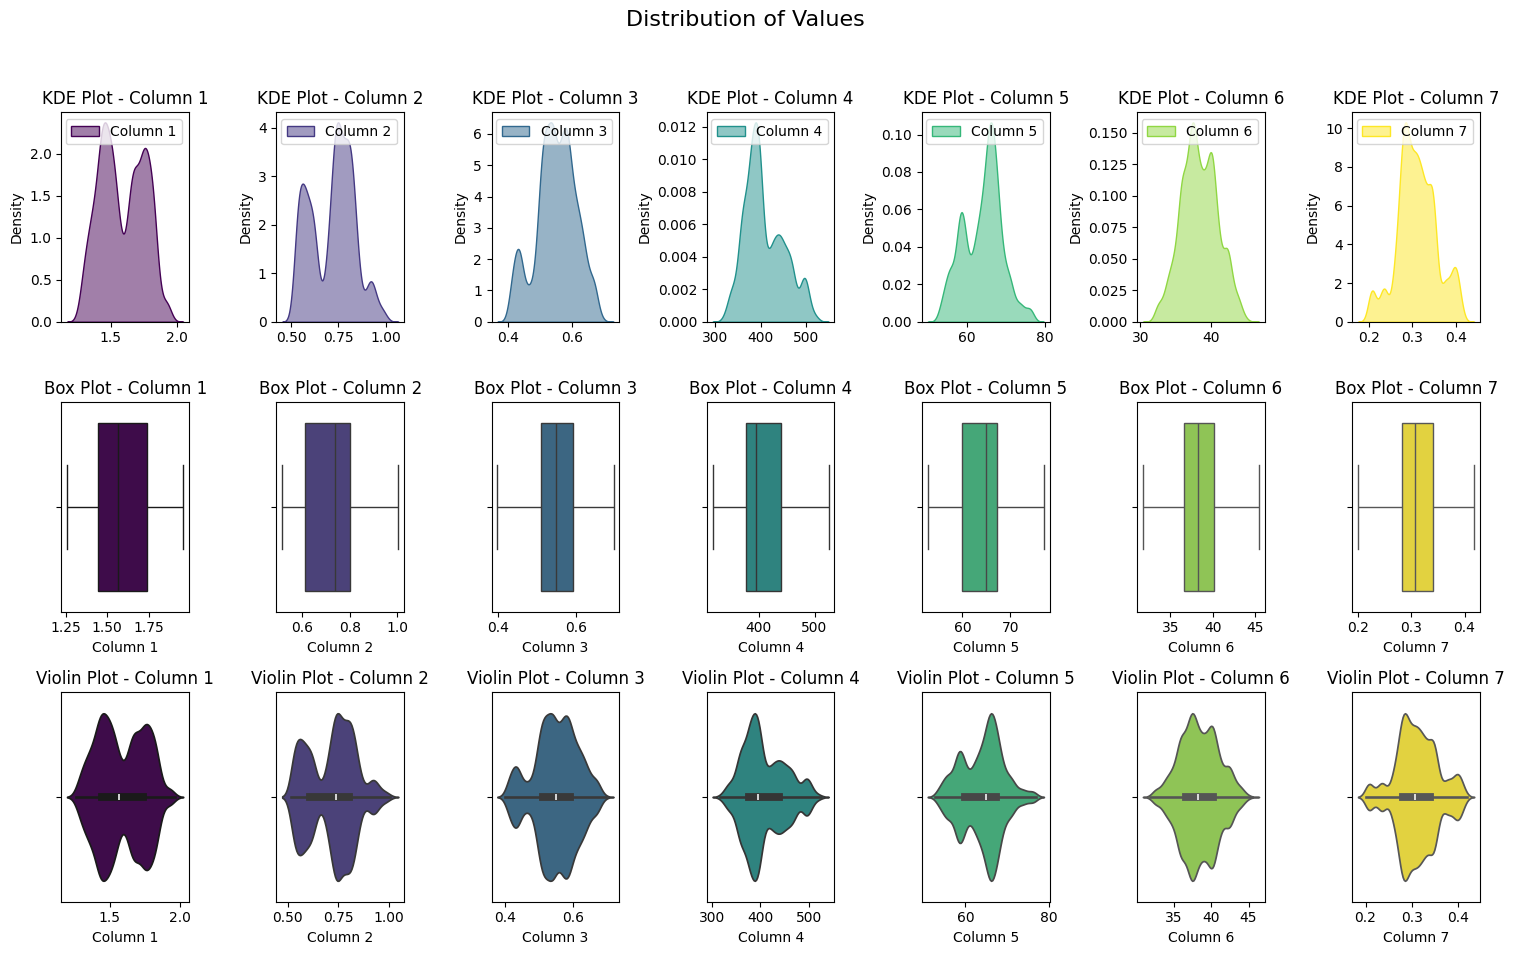

In [15]:
plot_distributions(data_mcd);

C:\Users\artur\AppData\Local\Temp\ipykernel_10504\2271007231.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(palette)(np.linspace(0, 1, n_cols))


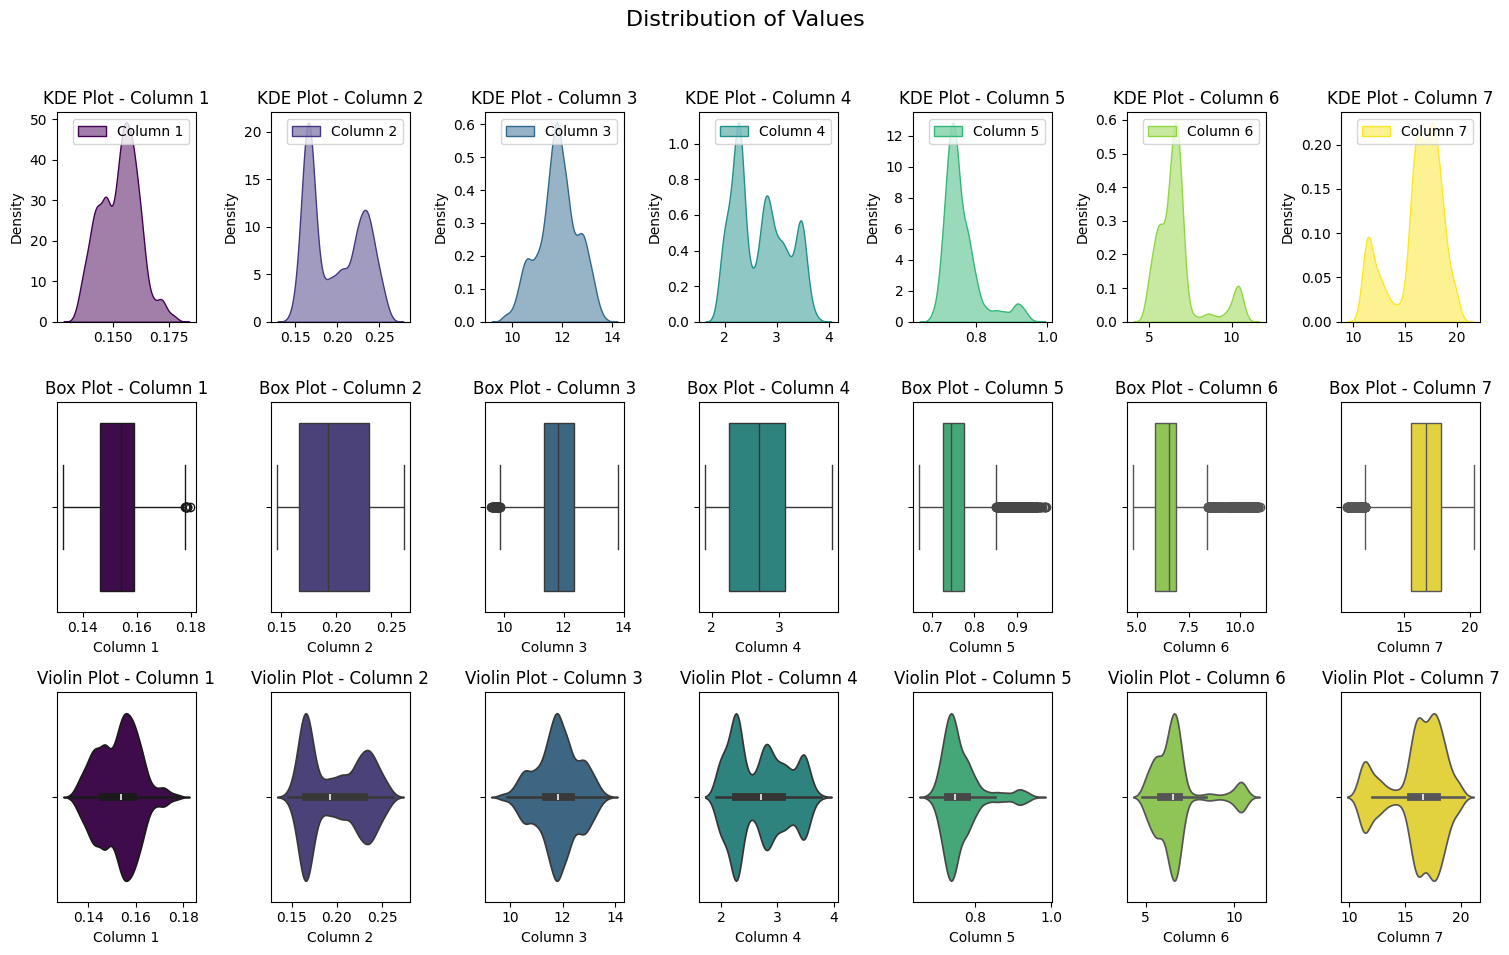

In [16]:
plot_distributions(data_luci);

In [17]:
eval_set = ['25.46nh30ab30', '25.47nh5ab80', '5.100nh40ab80', '5.102nh20ab40', '5.103nh40ab30', '5.106nh100ab40', '5.107nh55ab55', '5.109nh5ab55', '5.110nh10ab55', '5.112nh78ab35', '5.48nh20ab80', '5.80nh12ab40', '5.81nh5ab30']

def eval_performance(P,model,plot=False):
    
    total_error = 0
    all_error = []
    x_names = ['ester_mm', 'amox_mm', 'apa_mm', 'aoh_mm']

    for exp_name in eval_set:
        x_target = data_frames[exp_name].loc[:,x_names].to_numpy()
        t_target = data_frames[exp_name]['apa_t'].to_numpy()
        
        ic = x_target[0]
        
        sol_val = ode15s_amox(P,ic,t_target,model)
        x_model = sol_val
 
        error_per_variable = np.sqrt(np.mean((x_target - x_model) ** 2, axis=0))
        # Compute the mean of the observed values for each variable (mean across rows)
        mean_x_target_per_variable = np.mean(x_target, axis=0)

        # Compute relative RMSE (rRMSE) for each variable
        rRMSE_per_variable = (error_per_variable / mean_x_target_per_variable) * 100
        #print(rRMSE_per_variable)

        rMSRE = np.mean(rRMSE_per_variable)
        #print(rMSRE)

        total_error += rMSRE
        all_error.append(rMSRE)
        total_error += rMSRE

            
    print('\ntotal error: ',total_error,'\n')
        
    return total_error,all_error

In [18]:
luci_best_P = np.mean(data_luci,axis=0)
mcd_best_P = np.mean(data_mcd, axis=0)
print(luci_best_P)

[ 0.15294611  0.19756212 11.81620907  2.68317695  0.76054519  6.73168949
 16.15340786]


In [19]:
eval_performance(luci_best_P,model=luci_model)


total error:  843.6661356490729 



(843.6661356490729,
 [43.32777205280367,
  48.80062263977906,
  5.9995729485721805,
  36.14367574044857,
  18.85135281826328,
  62.89869147582063,
  6.786721162173717,
  26.89106388901333,
  26.685100959094346,
  32.007684038747406,
  38.297713089413406,
  28.129037631610693,
  47.014059378796176])

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def comprehensive_normality_tests(residuals, var_name):
    """
    Perform multiple normality tests and return results
    
    Parameters:
    -----------
    residuals : numpy.ndarray
        Array of residuals to test for normality
    var_name : str
        Name of the variable being tested
    
    Returns:
    --------
    dict containing normality test results
    """
    normality_results = {}
    
    # 1. Shapiro-Wilk Test
    shapiro_stat, shapiro_p = stats.shapiro(residuals)
    normality_results['shapiro_wilk'] = {
        'statistic': shapiro_stat,
        'p_value': shapiro_p,
        'is_normal': shapiro_p > 0.05
    }
    
    # 2. Anderson-Darling Test
    anderson_result = stats.anderson(residuals, dist='norm')
    normality_results['anderson_darling'] = {
        'statistic': anderson_result.statistic,
        'critical_values': anderson_result.critical_values,
        'significance_levels': anderson_result.significance_level,
        'is_normal': anderson_result.statistic < anderson_result.critical_values[2]  # Using 5% significance level
    }
    
    # 3. Kolmogorov-Smirnov Test
    ks_stat, ks_p = stats.kstest(residuals, 'norm')
    normality_results['kolmogorov_smirnov'] = {
        'statistic': ks_stat,
        'p_value': ks_p,
        'is_normal': ks_p > 0.05
    }
    
    # 4. Descriptive Statistics
    normality_results['descriptive_stats'] = {
        'mean': np.mean(residuals),
        'median': np.median(residuals),
        'std': np.std(residuals),
        'skewness': stats.skew(residuals),
        'kurtosis': stats.kurtosis(residuals)
    }
    
    return normality_results

def detailed_residual_analysis(P, model, eval_set, data_frames):
    """
    Perform comprehensive residual analysis for the chemical model
    
    Parameters:
    -----------
    P : numpy.ndarray
        Parameter set
    model : function
        ODE model function
    eval_set : list
        List of experiment names to evaluate
    data_frames : dict
        Dictionary of experimental dataframes
    
    Returns:
    --------
    dict containing residual analysis results
    """
    # Output names
    x_names = ['ester_mm', 'amox_mm', 'apa_mm', 'aoh_mm']
    
    # Prepare figure for residual plots
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    axes = axes.flatten()
    
    # Prepare results storage
    residual_analysis_results = {
        'residuals': {},
        'normality_tests': {}
    }
    
    # Iterate through each output variable
    for idx, var_name in enumerate(x_names):
        # Collect residuals for this variable across all experiments
        all_residuals = []
        all_predicted = []
        all_actual = []
        
        # Iterate through experiments
        for exp_name in eval_set:
            # Get target data
            x_target = data_frames[exp_name].loc[:, x_names].to_numpy()
            t_target = data_frames[exp_name]['apa_t'].to_numpy()
            
            # Initial conditions
            ic = x_target[0]
            
            # Model simulation
            sol_val = ode15s_amox(P, ic, t_target, model)
            x_model = sol_val
            
            # Residuals for this specific variable
            residuals = x_target[:, idx] - x_model[:, idx]
            
            # Collect data
            all_residuals.extend(residuals)
            all_predicted.extend(x_model[:, idx])
            all_actual.extend(x_target[:, idx])
        
        # Convert to numpy arrays
        all_residuals = np.array(all_residuals)
        all_predicted = np.array(all_predicted)
        all_actual = np.array(all_actual)
        
        # 1. Residual Plot (Predicted vs Residuals)
        axes[idx].scatter(all_predicted, all_residuals, alpha=0.6)
        axes[idx].set_title(f'Residual Plot for {var_name}')
        axes[idx].set_xlabel('Predicted Values')
        axes[idx].set_ylabel('Residuals')
        axes[idx].axhline(y=0, color='r', linestyle='--')
        
        # 2. Comprehensive Normality Analysis
        normality_results = comprehensive_normality_tests(all_residuals, var_name)
        
        # Store residual analysis results
        residual_analysis_results['residuals'][var_name] = {
            'values': all_residuals,
            'mean': np.mean(all_residuals),
            'std': np.std(all_residuals)
        }
        
        residual_analysis_results['normality_tests'][var_name] = normality_results
    
    # Adjust layout and add overall title
    plt.tight_layout()
    fig.suptitle('Residual Analysis for Chemical Model Outputs', fontsize=16, y=1.02)
    
    # Additional residual diagnostics plots
    fig2, axes2 = plt.subplots(2, 2, figsize=(20, 16))
    axes2 = axes2.flatten()
    
    # Q-Q plots, Histograms, and Boxplots of Residuals
    for idx, var_name in enumerate(x_names):
        residuals = residual_analysis_results['residuals'][var_name]['values']
        
        # Q-Q Plot
        stats.probplot(residuals, dist="norm", plot=axes2[idx])
        axes2[idx].set_title(f'Q-Q Plot of Residuals for {var_name}')
    
    plt.tight_layout()
    fig2.suptitle('Residual Diagnostics', fontsize=16, y=1.02)
    
    # Create a third figure for histograms and kernel density estimation
    fig3, axes3 = plt.subplots(2, 2, figsize=(20, 16))
    axes3 = axes3.flatten()
    
    for idx, var_name in enumerate(x_names):
        residuals = residual_analysis_results['residuals'][var_name]['values']
        
        # Histogram with KDE
        sns.histplot(residuals, kde=True, ax=axes3[idx], stat='density')
        axes3[idx].set_title(f'Histogram of Residuals for {var_name}')
        axes3[idx].set_xlabel('Residual Value')
        axes3[idx].set_ylabel('Density')
    
    plt.tight_layout()
    fig3.suptitle('Residual Distribution', fontsize=16, y=1.02)
    
    return residual_analysis_results



In [21]:
def time_based_residual_analysis(P, model, eval_set, data_frames):
    """
    Perform comprehensive time-based residual analysis for the chemical model
    
    Parameters:
    -----------
    P : numpy.ndarray
        Parameter set
    model : function
        ODE model function
    eval_set : list
        List of experiment names to evaluate
    data_frames : dict
        Dictionary of experimental dataframes
    
    Returns:
    --------
    dict containing time-based residual analysis results
    """
    # Output names
    x_names = ['ester_mm', 'amox_mm', 'apa_mm', 'aoh_mm']
    
    # Prepare results storage
    time_residual_analysis = {
        'time_residuals': {},
        'autocorrelation': {}
    }
    
    # Create a figure for time-based residual plots
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    axes = axes.flatten()
    
    # Iterate through each output variable
    for idx, var_name in enumerate(x_names):
        # Prepare lists for time-based analysis
        time_series_residuals = []
        time_series_timestamps = []
        
        # Iterate through experiments
        for exp_name in eval_set:
            # Get target data
            x_target = data_frames[exp_name].loc[:, x_names].to_numpy()
            t_target = data_frames[exp_name]['apa_t'].to_numpy()
            
            # Initial conditions
            ic = x_target[0]
            
            # Model simulation
            sol_val = ode15s_amox(P, ic, t_target, model)
            x_model = sol_val
            
            # Residuals for this specific variable
            residuals = x_target[:, idx] - x_model[:, idx]
            
            # Collect time series data
            time_series_residuals.extend(residuals)
            time_series_timestamps.extend(t_target)
        
        # Convert to numpy arrays
        time_series_residuals = np.array(time_series_residuals)
        time_series_timestamps = np.array(time_series_timestamps)
        
        # Sort by timestamp to ensure chronological order
        sort_indices = np.argsort(time_series_timestamps)
        sorted_timestamps = time_series_timestamps[sort_indices]
        sorted_residuals = time_series_residuals[sort_indices]
        
        # Time Series Residual Plot
        axes[idx].scatter(sorted_timestamps, sorted_residuals, alpha=0.6)
        axes[idx].set_title(f'Residuals over Time for {var_name}')
        axes[idx].set_xlabel('Time')
        axes[idx].set_ylabel('Residuals')
        axes[idx].axhline(y=0, color='r', linestyle='--')
        
        # Calculate and plot moving average of residuals
        window_size = max(5, len(sorted_residuals) // 10)  # Adaptive window size
        moving_avg = np.convolve(sorted_residuals, np.ones(window_size)/window_size, mode='valid')
        moving_avg_timestamps = sorted_timestamps[window_size-1:]
        
        # Store time-based residual analysis results
        time_residual_analysis['time_residuals'][var_name] = {
            'timestamps': sorted_timestamps,
            'residuals': sorted_residuals
        }
        
        # Autocorrelation Analysis
        max_lag = min(50, len(sorted_residuals) // 2)
        autocorr = [np.corrcoef(sorted_residuals[:-i], sorted_residuals[i:])[0,1] 
                    for i in range(1, max_lag+1)]
        
        time_residual_analysis['autocorrelation'][var_name] = {
            'lags': list(range(1, max_lag+1)),
            'values': autocorr
        }
    
    # Adjust layout
    plt.tight_layout()
    plt.suptitle('Time-Based Residual Analysis', fontsize=16, y=1.02)
    
    # Create Autocorrelation Plot
    fig_autocorr, axes_autocorr = plt.subplots(2, 2, figsize=(20, 16))
    axes_autocorr = axes_autocorr.flatten()
    
    # Plot Autocorrelation for each variable
    for idx, var_name in enumerate(x_names):
        autocorr_data = time_residual_analysis['autocorrelation'][var_name]
        axes_autocorr[idx].bar(autocorr_data['lags'], autocorr_data['values'])
        axes_autocorr[idx].set_title(f'Autocorrelation of Residuals for {var_name}')
        axes_autocorr[idx].set_xlabel('Lag')
        axes_autocorr[idx].set_ylabel('Autocorrelation')
        axes_autocorr[idx].axhline(y=0, color='r', linestyle='--')
        
        # Add confidence interval lines
        n = len(autocorr_data['values'])
        confidence_interval = 1.96 / np.sqrt(n)
        axes_autocorr[idx].axhline(y=confidence_interval, color='g', linestyle='--')
        axes_autocorr[idx].axhline(y=-confidence_interval, color='g', linestyle='--')
    
    plt.tight_layout()
    plt.suptitle('Autocorrelation of Residuals', fontsize=16, y=1.02)
    
    # Create Residual Distribution over Time
    fig_dist, axes_dist = plt.subplots(2, 2, figsize=(20, 16))
    axes_dist = axes_dist.flatten()
    
    for idx, var_name in enumerate(x_names):
        time_data = time_residual_analysis['time_residuals'][var_name]
        
        # Create a heatmap-like visualization of residuals over time
        # Bin the timestamps and residuals
        time_bins = np.linspace(time_data['timestamps'].min(), time_data['timestamps'].max(), 20)
        residual_bins = np.linspace(time_data['residuals'].min(), time_data['residuals'].max(), 20)
        
        # Use 2D histogram to show residual distribution changes over time
        h, x_edges, y_edges = np.histogram2d(
            time_data['timestamps'], 
            time_data['residuals'], 
            bins=[time_bins, residual_bins]
        )
        
        # Plot heatmap
        im = axes_dist[idx].imshow(
            h.T, 
            aspect='auto', 
            origin='lower', 
            extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]],
            cmap='viridis'
        )
        axes_dist[idx].set_title(f'Residual Distribution over Time for {var_name}')
        axes_dist[idx].set_xlabel('Time')
        axes_dist[idx].set_ylabel('Residual Value')
        plt.colorbar(im, ax=axes_dist[idx], label='Frequency')
    
    plt.tight_layout()
    plt.suptitle('Residual Distribution over Time', fontsize=16, y=1.02)
    
    return time_residual_analysis


Normality Analysis for ester_mm:

Shapiro-Wilk Test:
Statistic: 0.8887
P-value: 0.0000
Normally distributed: False

Anderson-Darling Test:
Statistic: 5.8546
Critical Values at different significance levels:
15.0%: 0.5610
10.0%: 0.6380
5.0%: 0.7660
2.5%: 0.8930
1.0%: 1.0630
Normally distributed: False

Kolmogorov-Smirnov Test:
Statistic: 0.2039
P-value: 0.0000
Normally distributed: False

Descriptive Statistics:
Mean: 0.1110
Median: 0.0000
Std: 4.1982
Skewness: 0.5226
Kurtosis: 2.6949

Normality Analysis for amox_mm:

Shapiro-Wilk Test:
Statistic: 0.9079
P-value: 0.0000
Normally distributed: False

Anderson-Darling Test:
Statistic: 3.5481
Critical Values at different significance levels:
15.0%: 0.5610
10.0%: 0.6380
5.0%: 0.7660
2.5%: 0.8930
1.0%: 1.0630
Normally distributed: False

Kolmogorov-Smirnov Test:
Statistic: 0.0790
P-value: 0.3331
Normally distributed: True

Descriptive Statistics:
Mean: -0.1628
Median: 0.0000
Std: 1.1953
Skewness: -1.2217
Kurtosis: 2.0518

Normality Analysis 

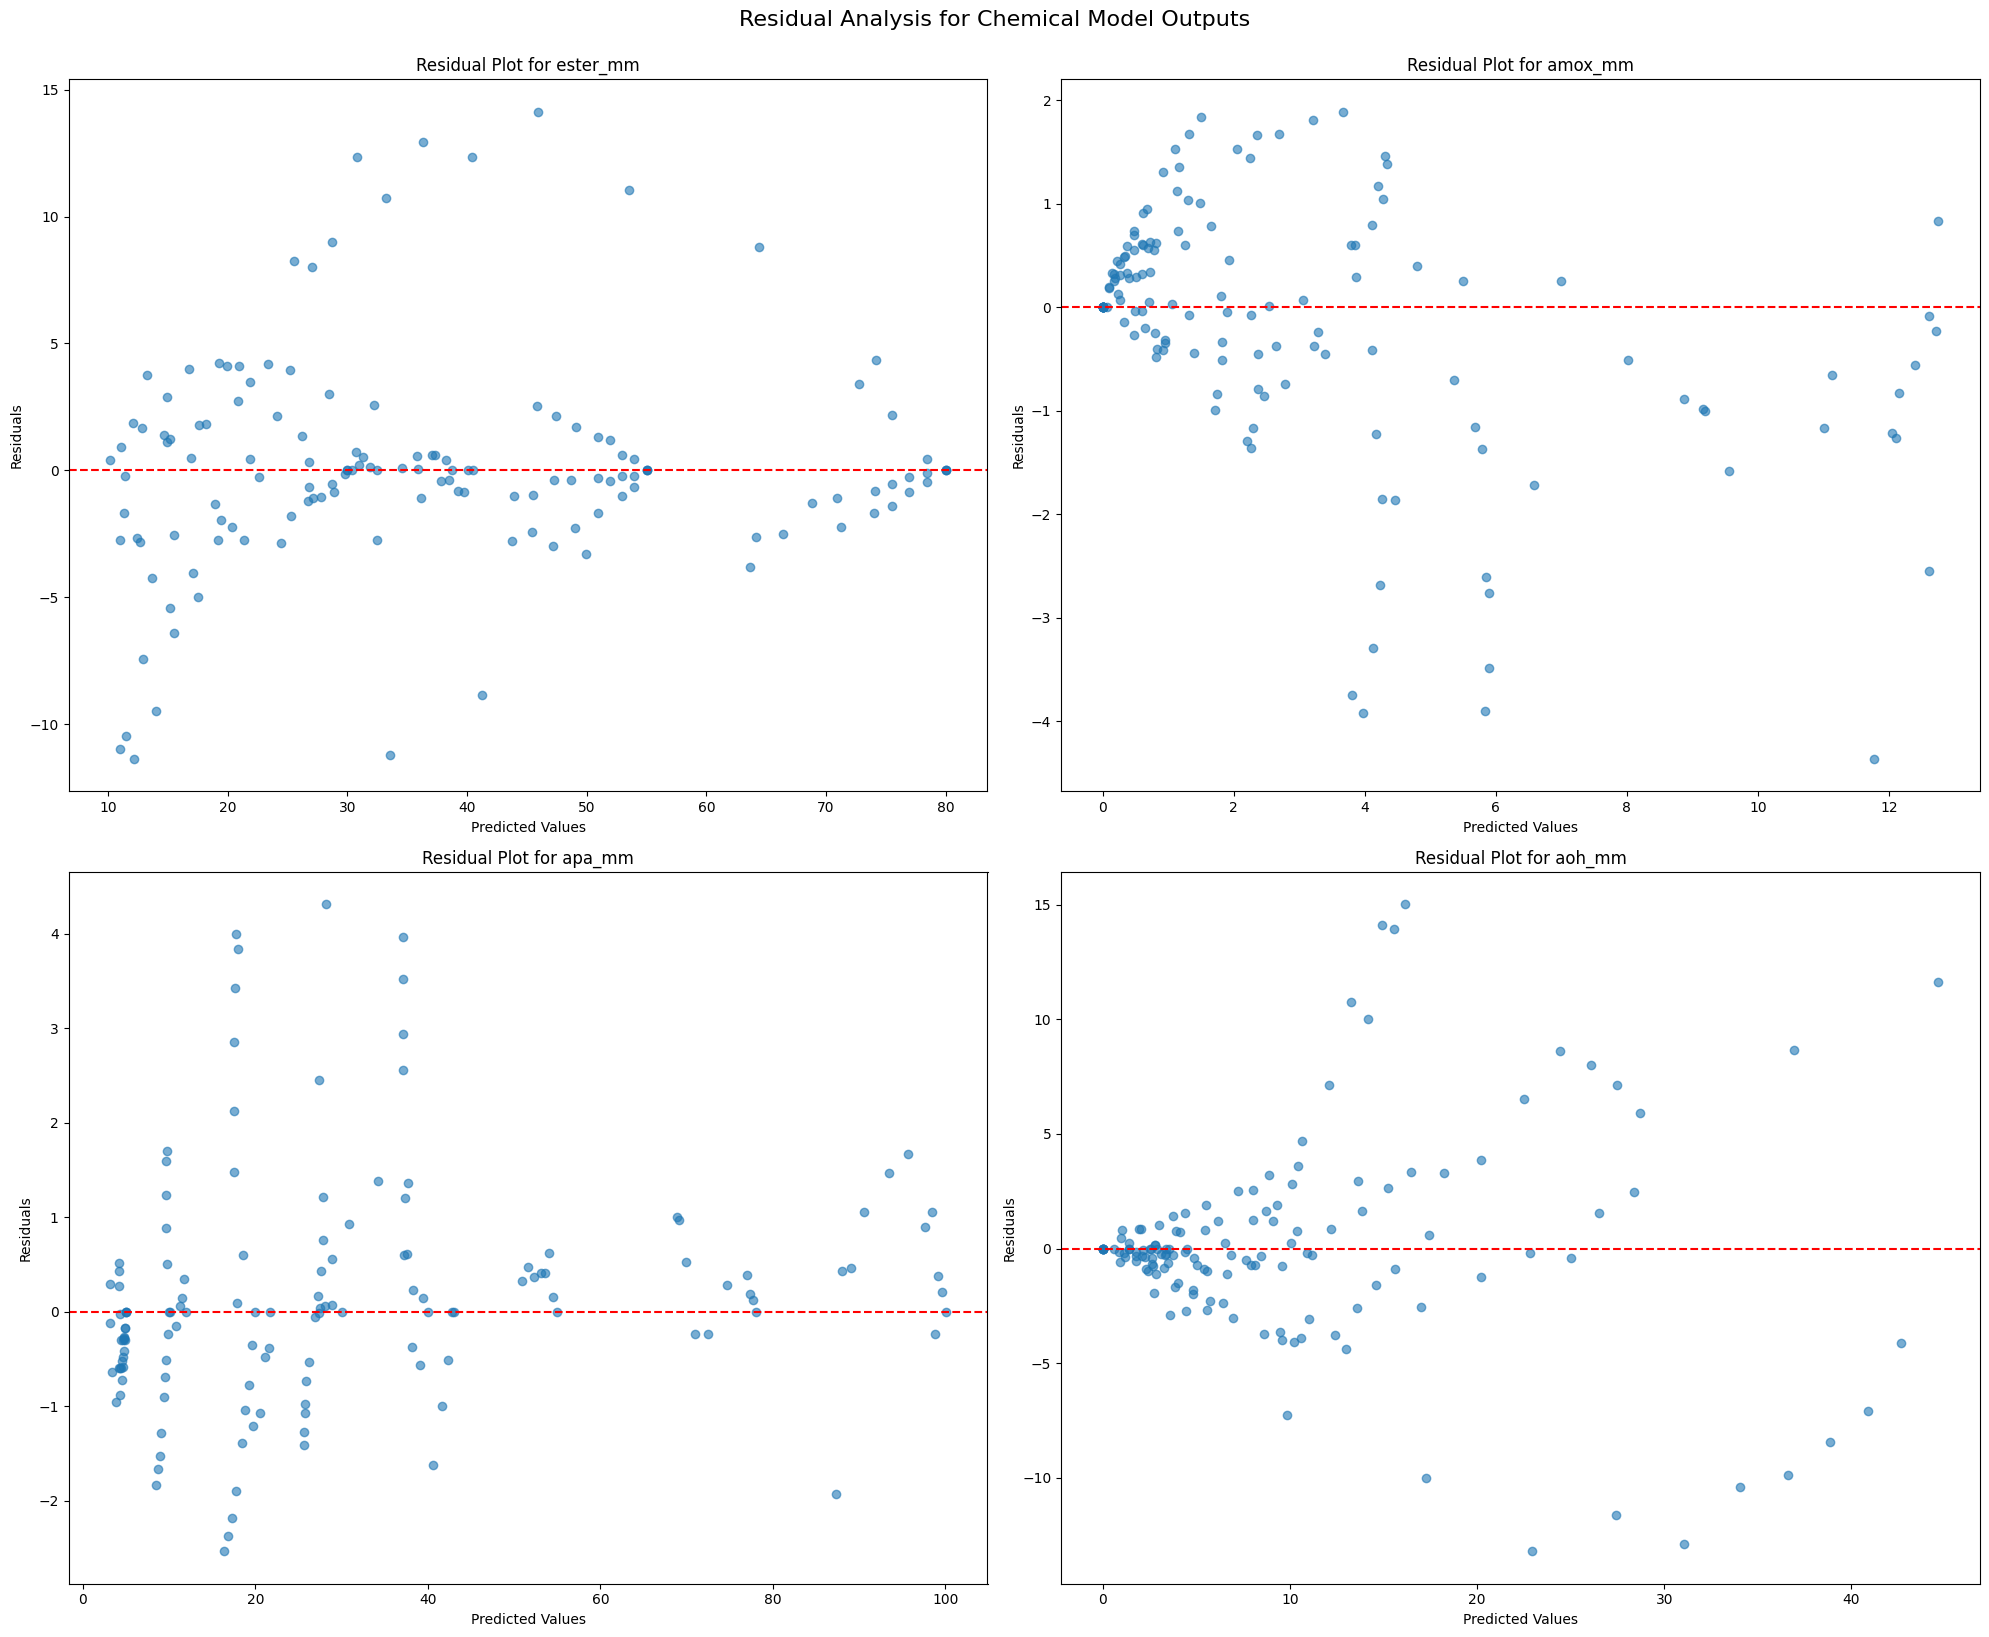

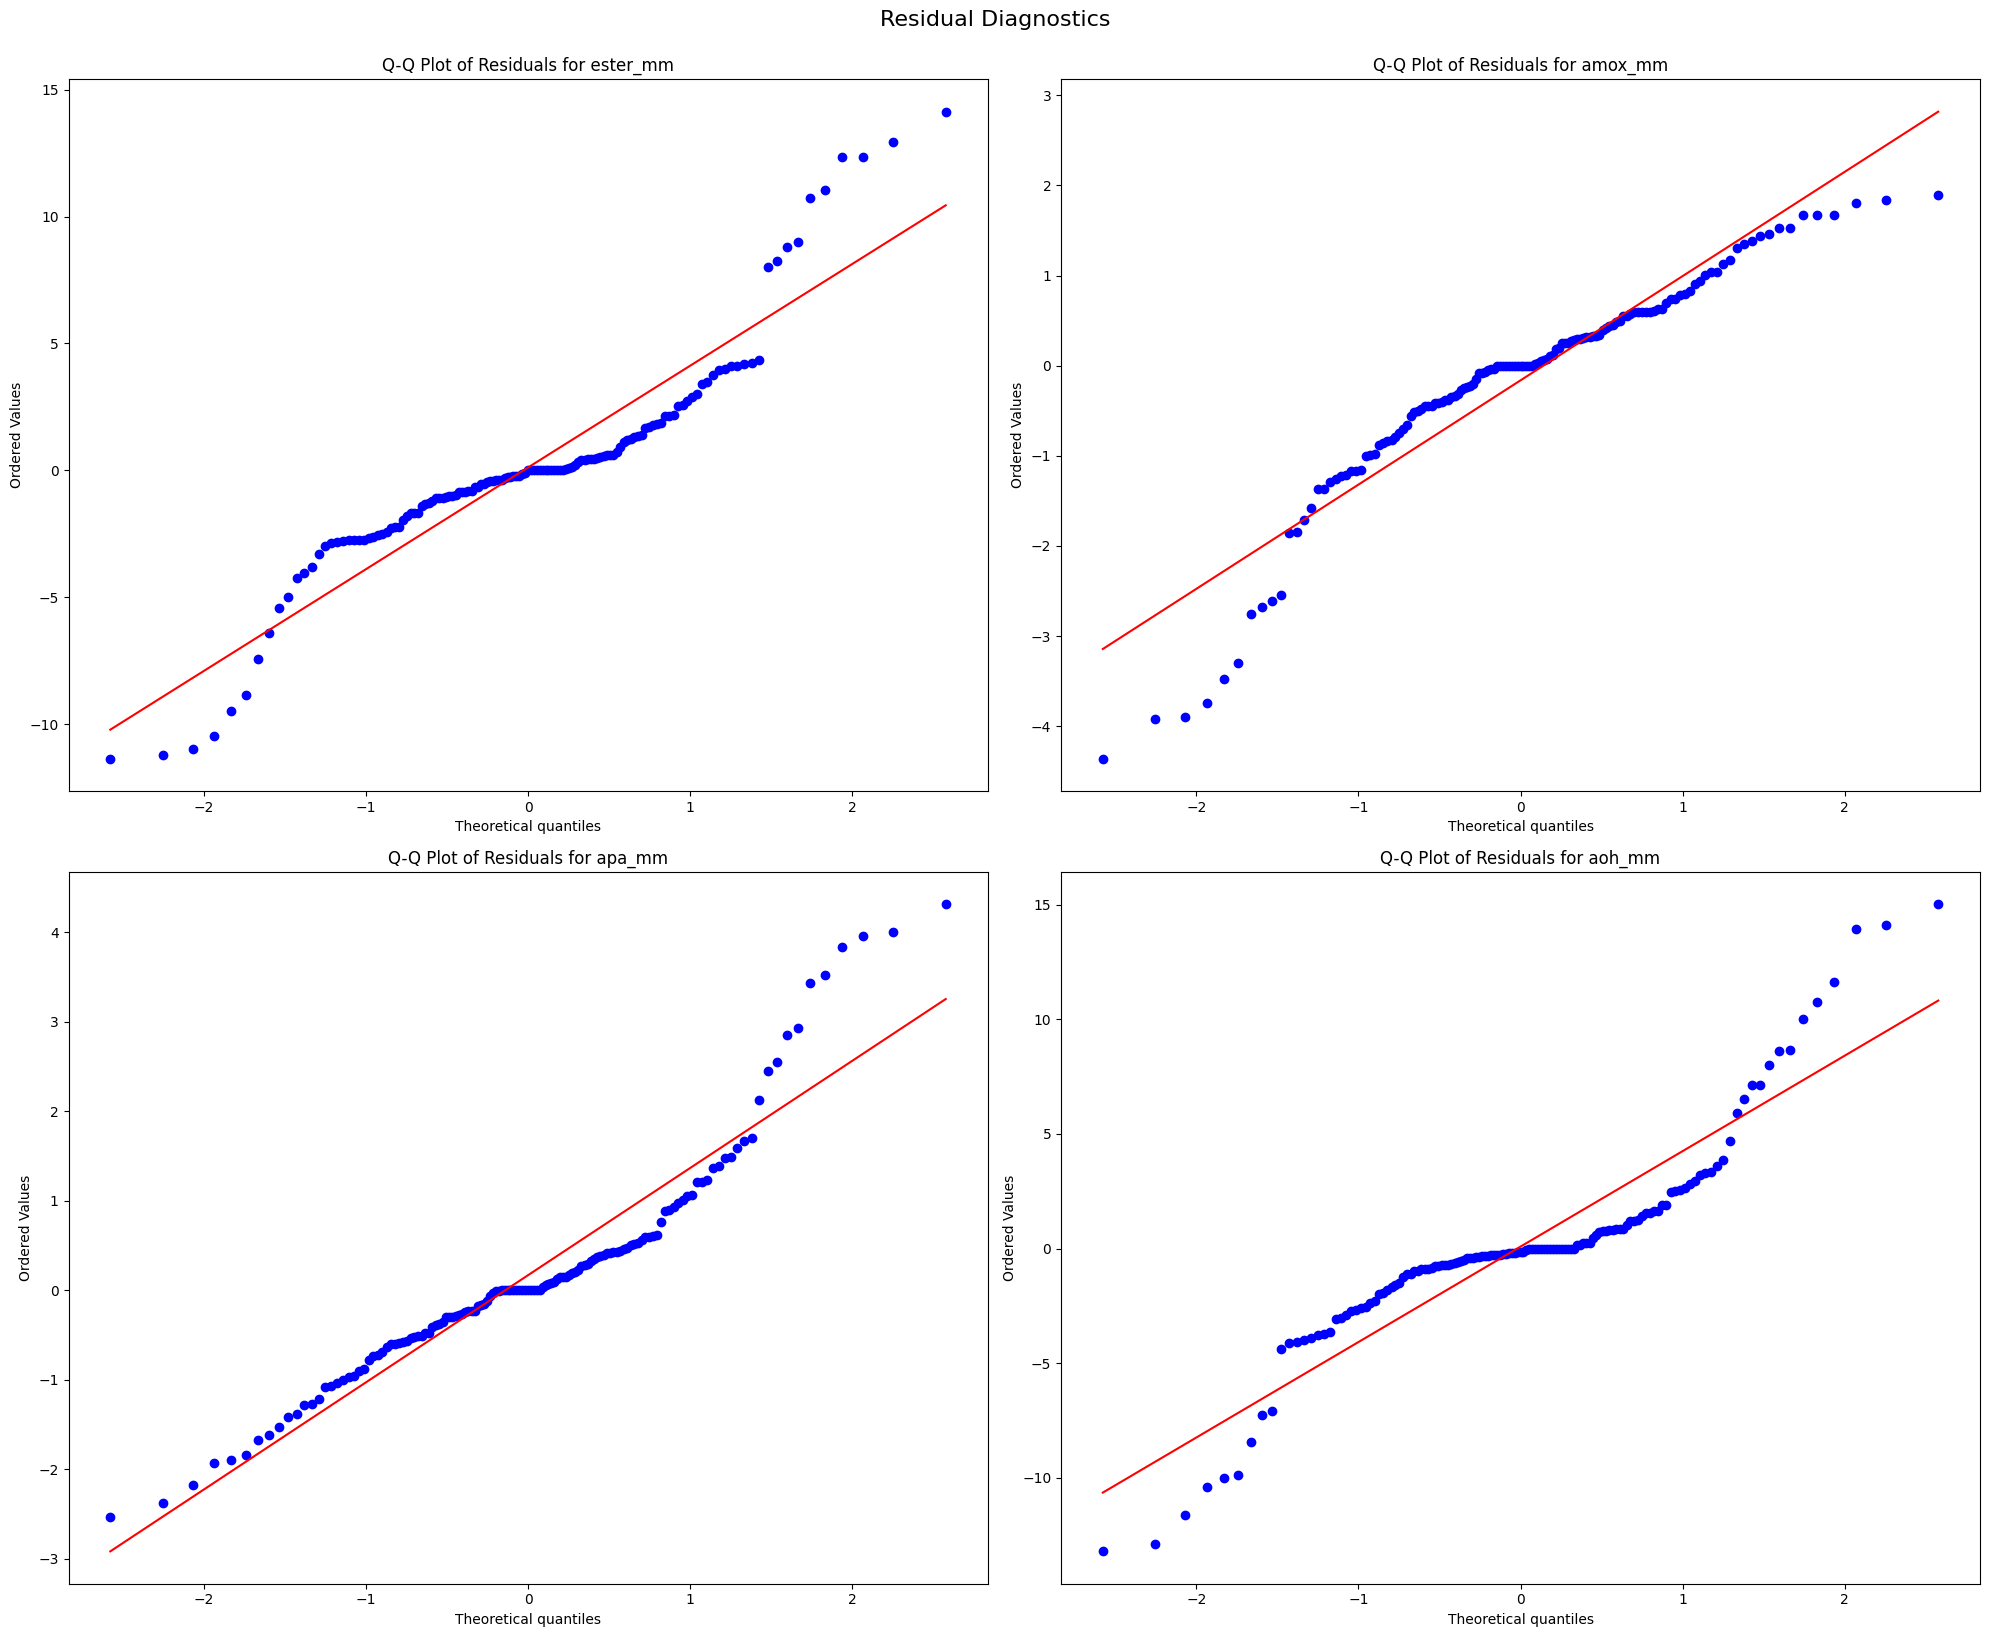

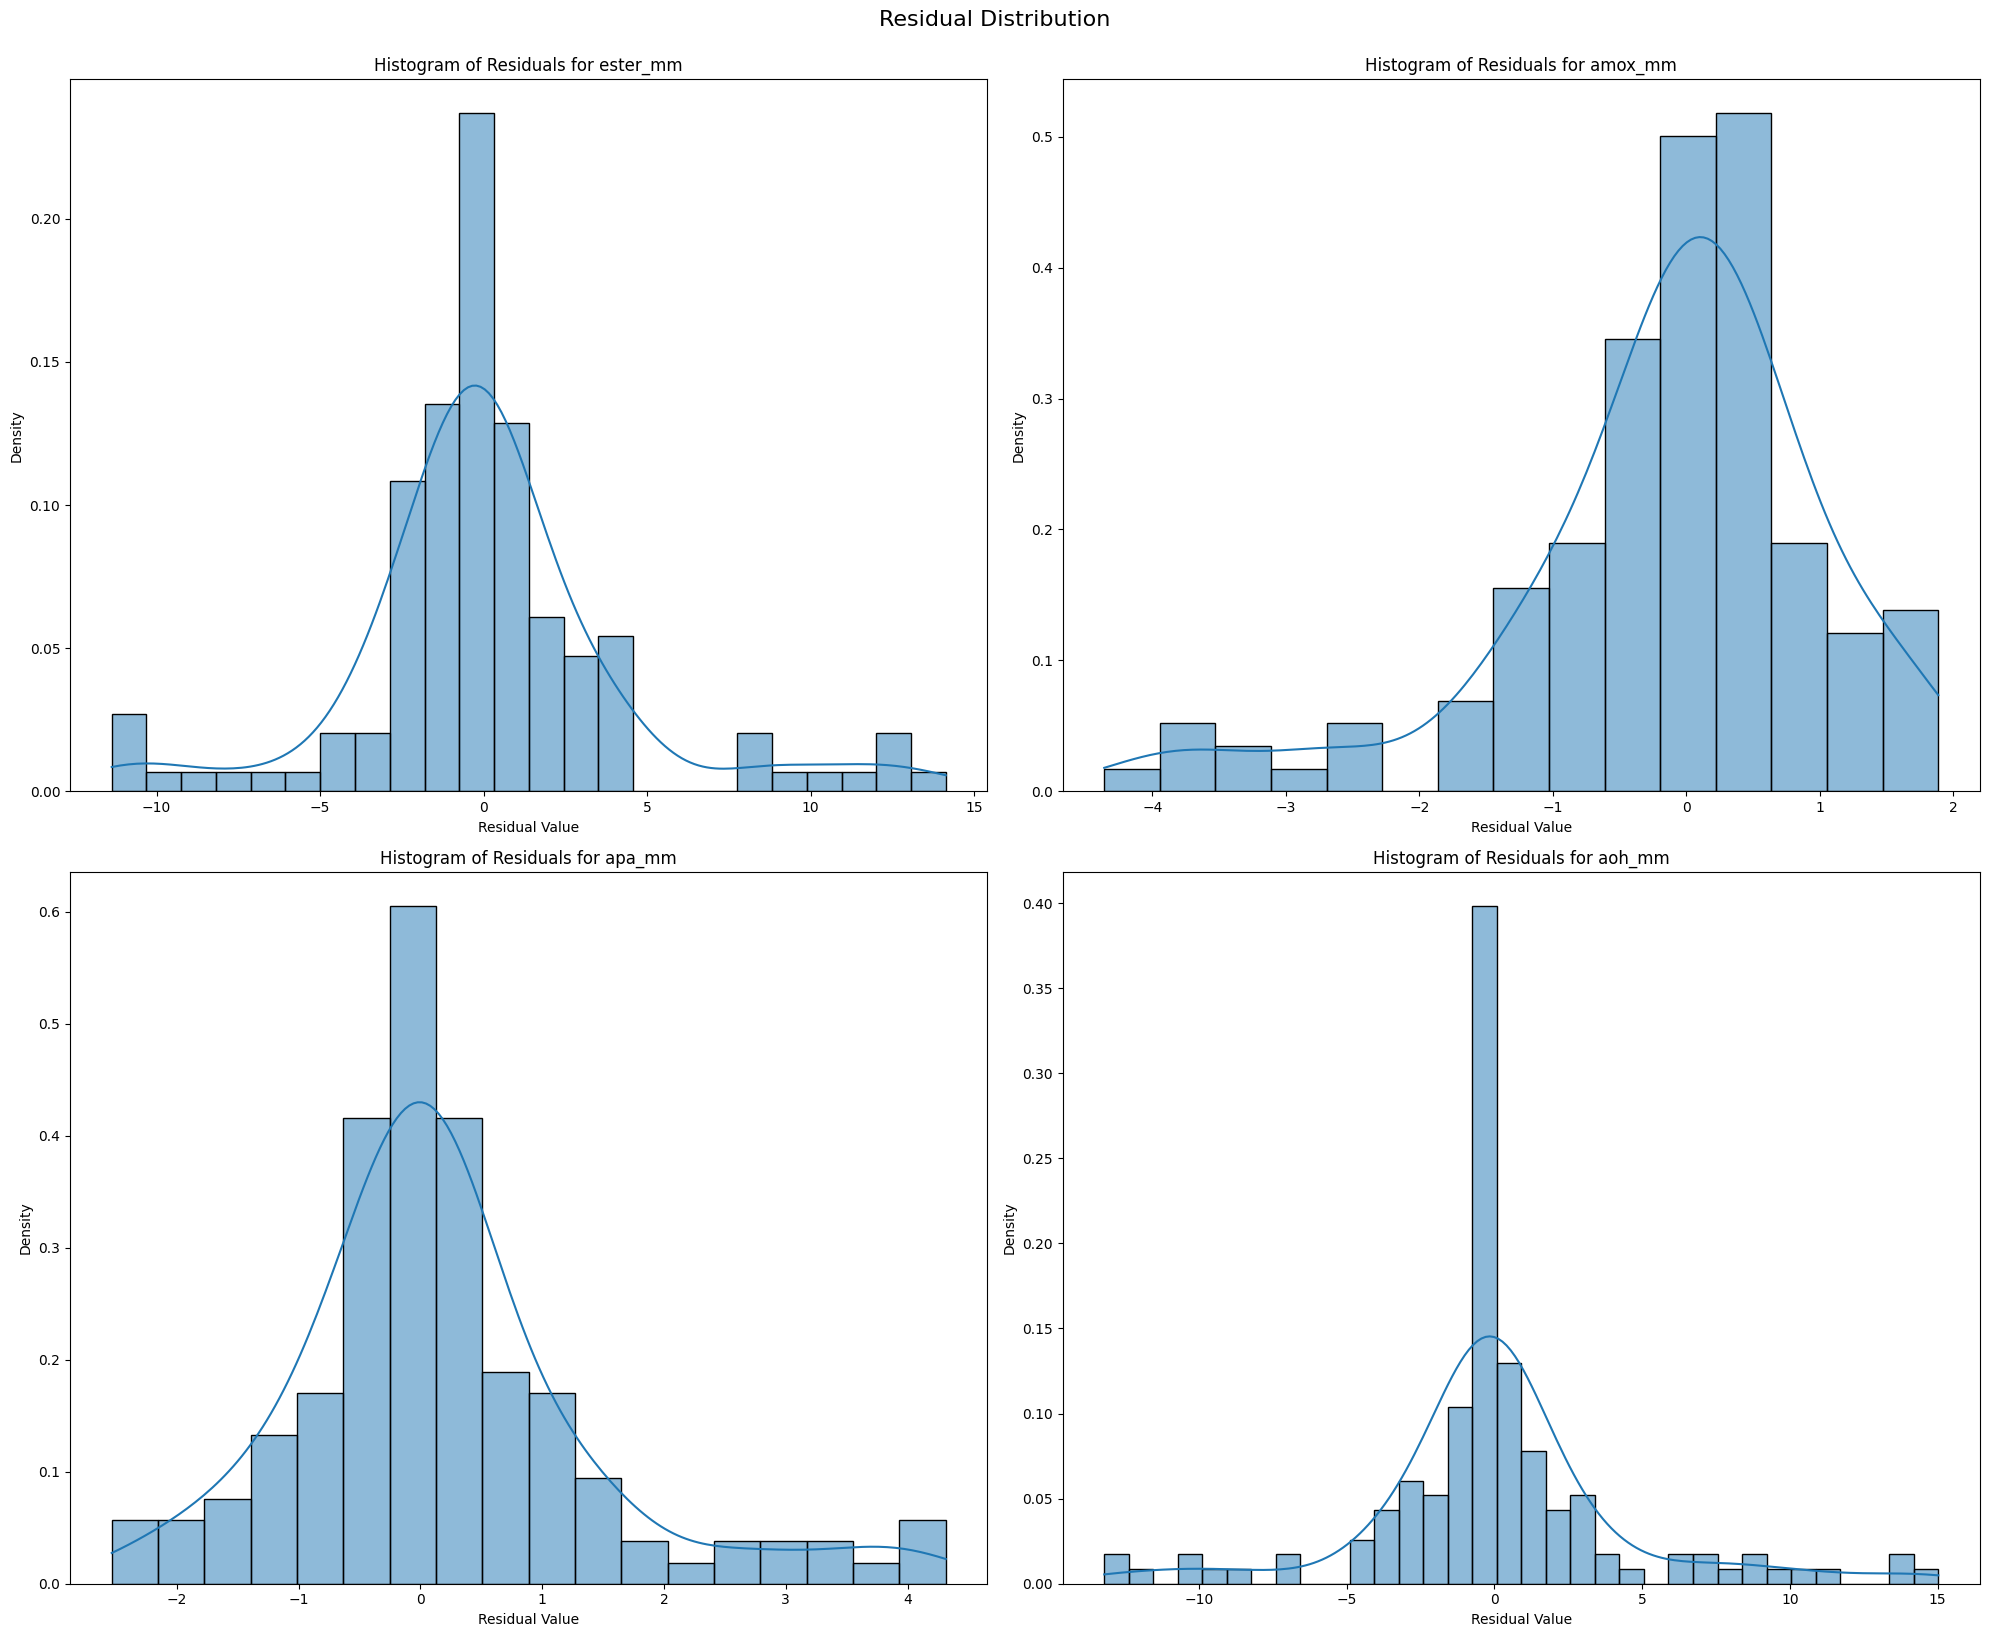

In [22]:
residual_results = detailed_residual_analysis(
    mcd_best_P, 
    mcd_model, 
    eval_set, 
    data_frames
)

# Print out comprehensive normality analysis results
for var_name, test_results in residual_results['normality_tests'].items():
    print(f"\nNormality Analysis for {var_name}:")
    
    # Shapiro-Wilk Test
    print("\nShapiro-Wilk Test:")
    print(f"Statistic: {test_results['shapiro_wilk']['statistic']:.4f}")
    print(f"P-value: {test_results['shapiro_wilk']['p_value']:.4f}")
    print(f"Normally distributed: {test_results['shapiro_wilk']['is_normal']}")
    
    # Anderson-Darling Test
    print("\nAnderson-Darling Test:")
    print(f"Statistic: {test_results['anderson_darling']['statistic']:.4f}")
    print("Critical Values at different significance levels:")
    for level, crit_val in zip(test_results['anderson_darling']['significance_levels'], 
                                test_results['anderson_darling']['critical_values']):
        print(f"{level}%: {crit_val:.4f}")
    print(f"Normally distributed: {test_results['anderson_darling']['is_normal']}")
    
    # Kolmogorov-Smirnov Test
    print("\nKolmogorov-Smirnov Test:")
    print(f"Statistic: {test_results['kolmogorov_smirnov']['statistic']:.4f}")
    print(f"P-value: {test_results['kolmogorov_smirnov']['p_value']:.4f}")
    print(f"Normally distributed: {test_results['kolmogorov_smirnov']['is_normal']}")
    
    # Descriptive Statistics
    print("\nDescriptive Statistics:")
    for stat_name, stat_value in test_results['descriptive_stats'].items():
        print(f"{stat_name.capitalize()}: {stat_value:.4f}")



Normality Analysis for ester_mm:

Shapiro-Wilk Test:
Statistic: 0.7519
P-value: 0.0000
Normally distributed: False

Anderson-Darling Test:
Statistic: 7.3384
Critical Values at different significance levels:
15.0%: 0.5610
10.0%: 0.6380
5.0%: 0.7660
2.5%: 0.8930
1.0%: 1.0630
Normally distributed: False

Kolmogorov-Smirnov Test:
Statistic: 0.3217
P-value: 0.0000
Normally distributed: False

Descriptive Statistics:
Mean: -1.6587
Median: -0.8222
Std: 4.9016
Skewness: -2.9017
Kurtosis: 14.1450

Normality Analysis for amox_mm:

Shapiro-Wilk Test:
Statistic: 0.8675
P-value: 0.0000
Normally distributed: False

Anderson-Darling Test:
Statistic: 4.9369
Critical Values at different significance levels:
15.0%: 0.5610
10.0%: 0.6380
5.0%: 0.7660
2.5%: 0.8930
1.0%: 1.0630
Normally distributed: False

Kolmogorov-Smirnov Test:
Statistic: 0.1096
P-value: 0.0655
Normally distributed: True

Descriptive Statistics:
Mean: 0.1940
Median: 0.0057
Std: 1.4145
Skewness: 1.6519
Kurtosis: 6.1851

Normality Analysi

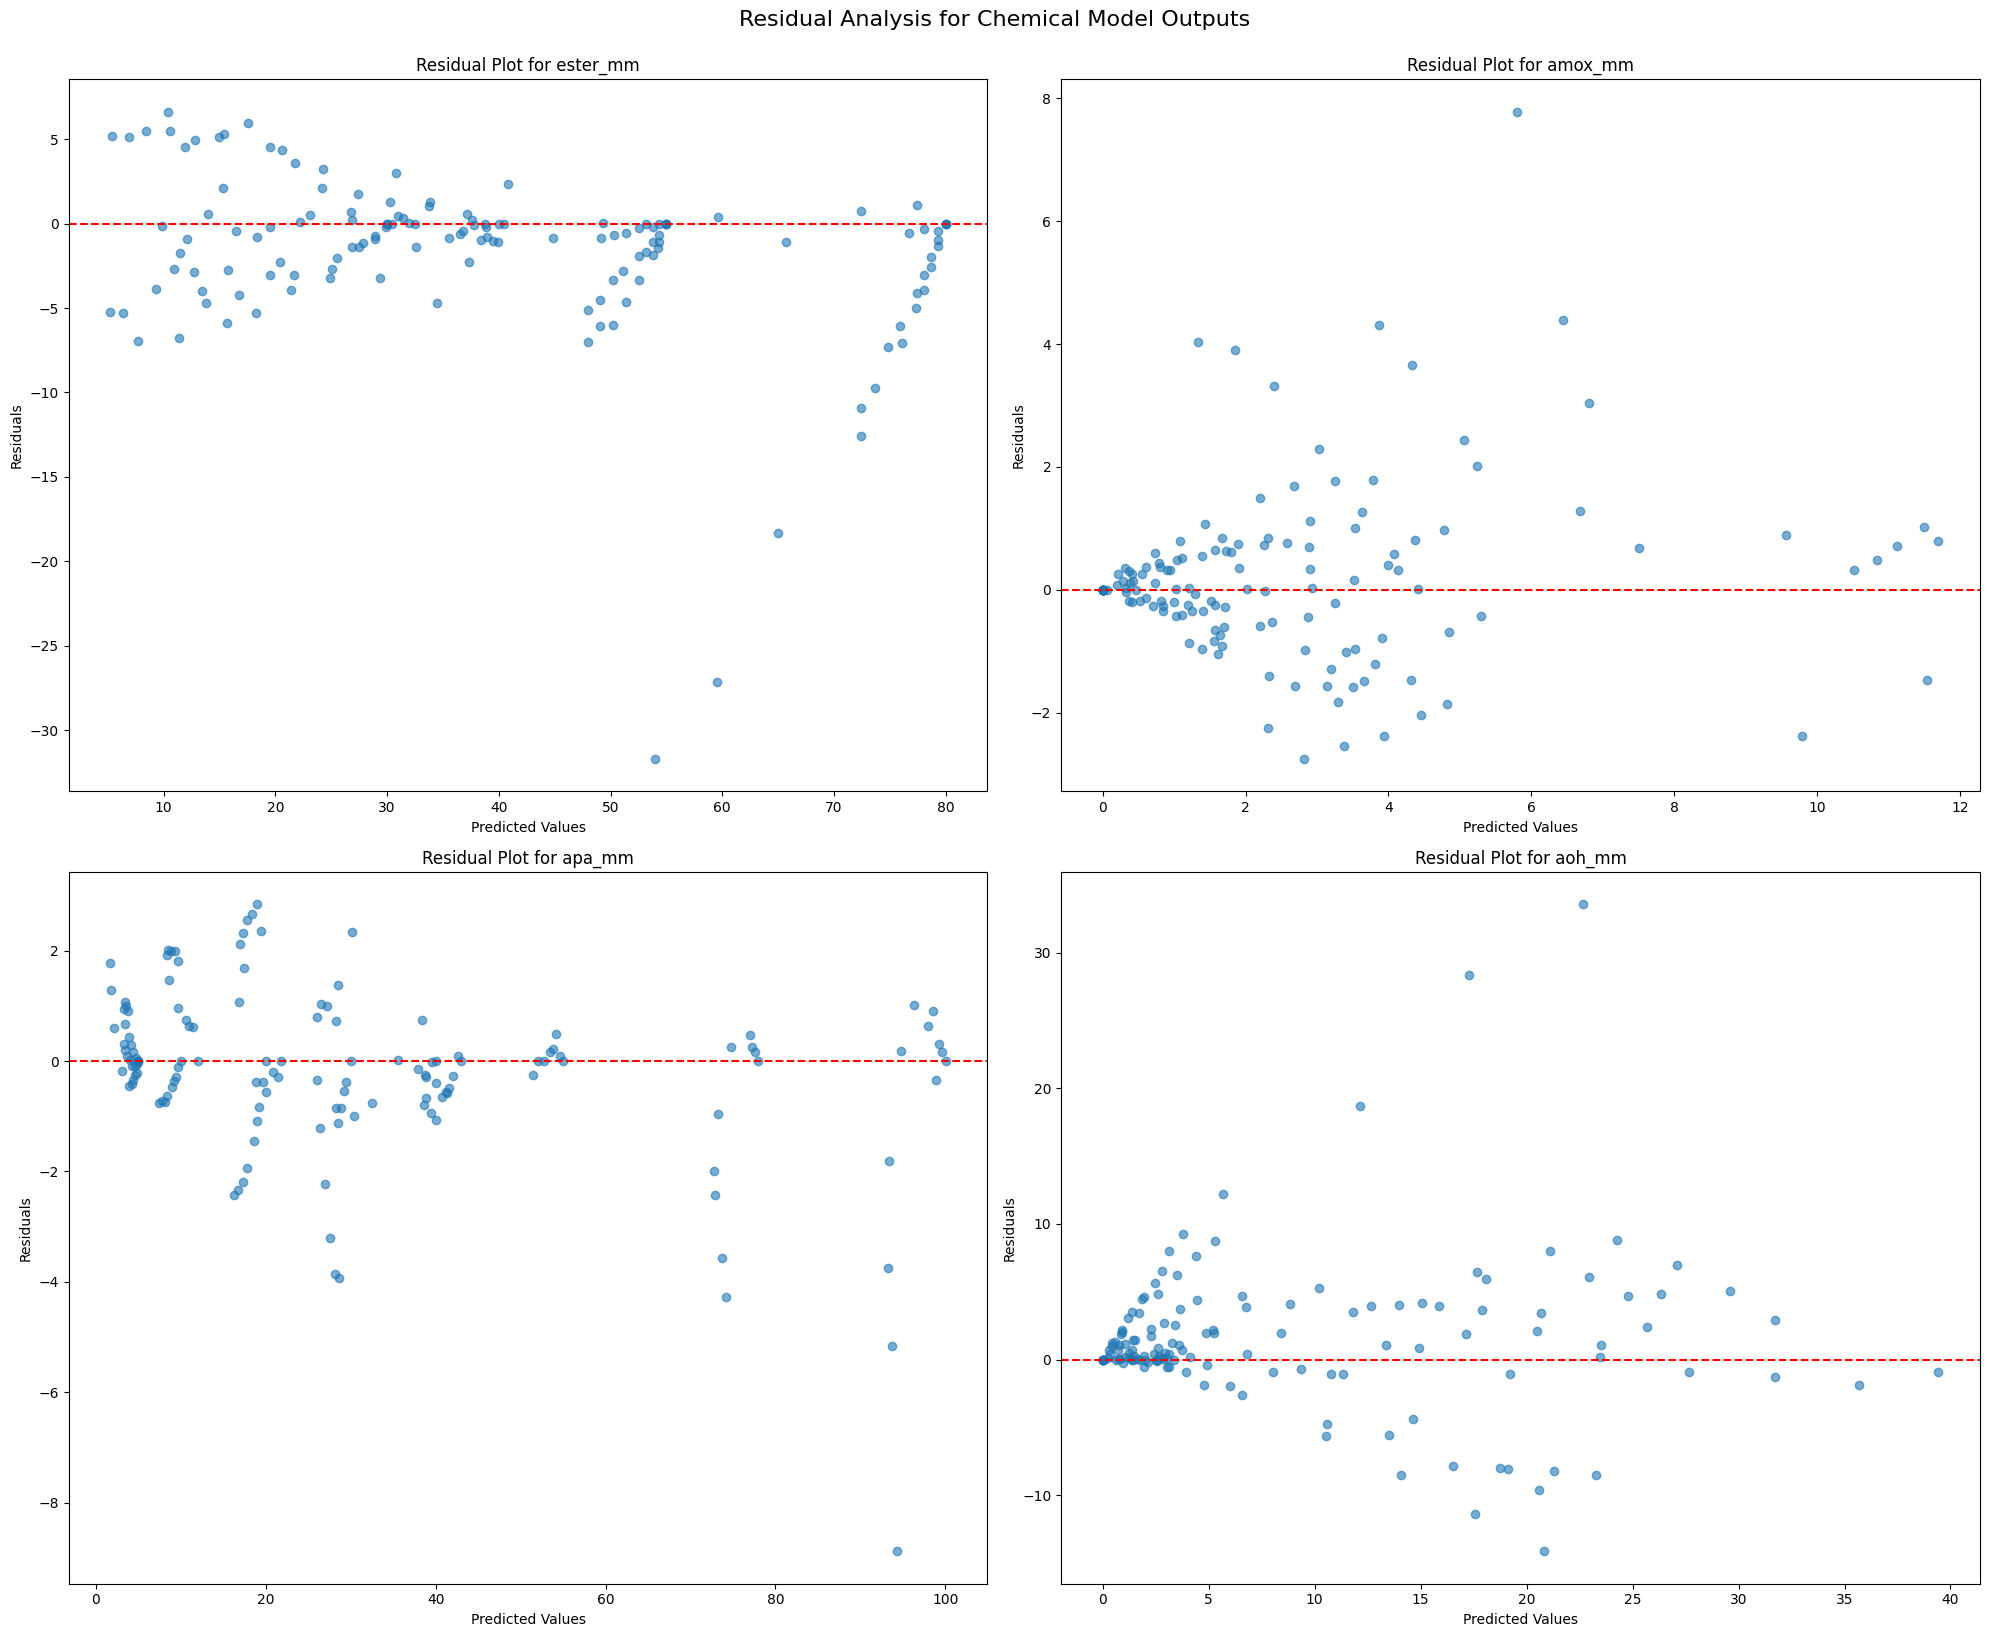

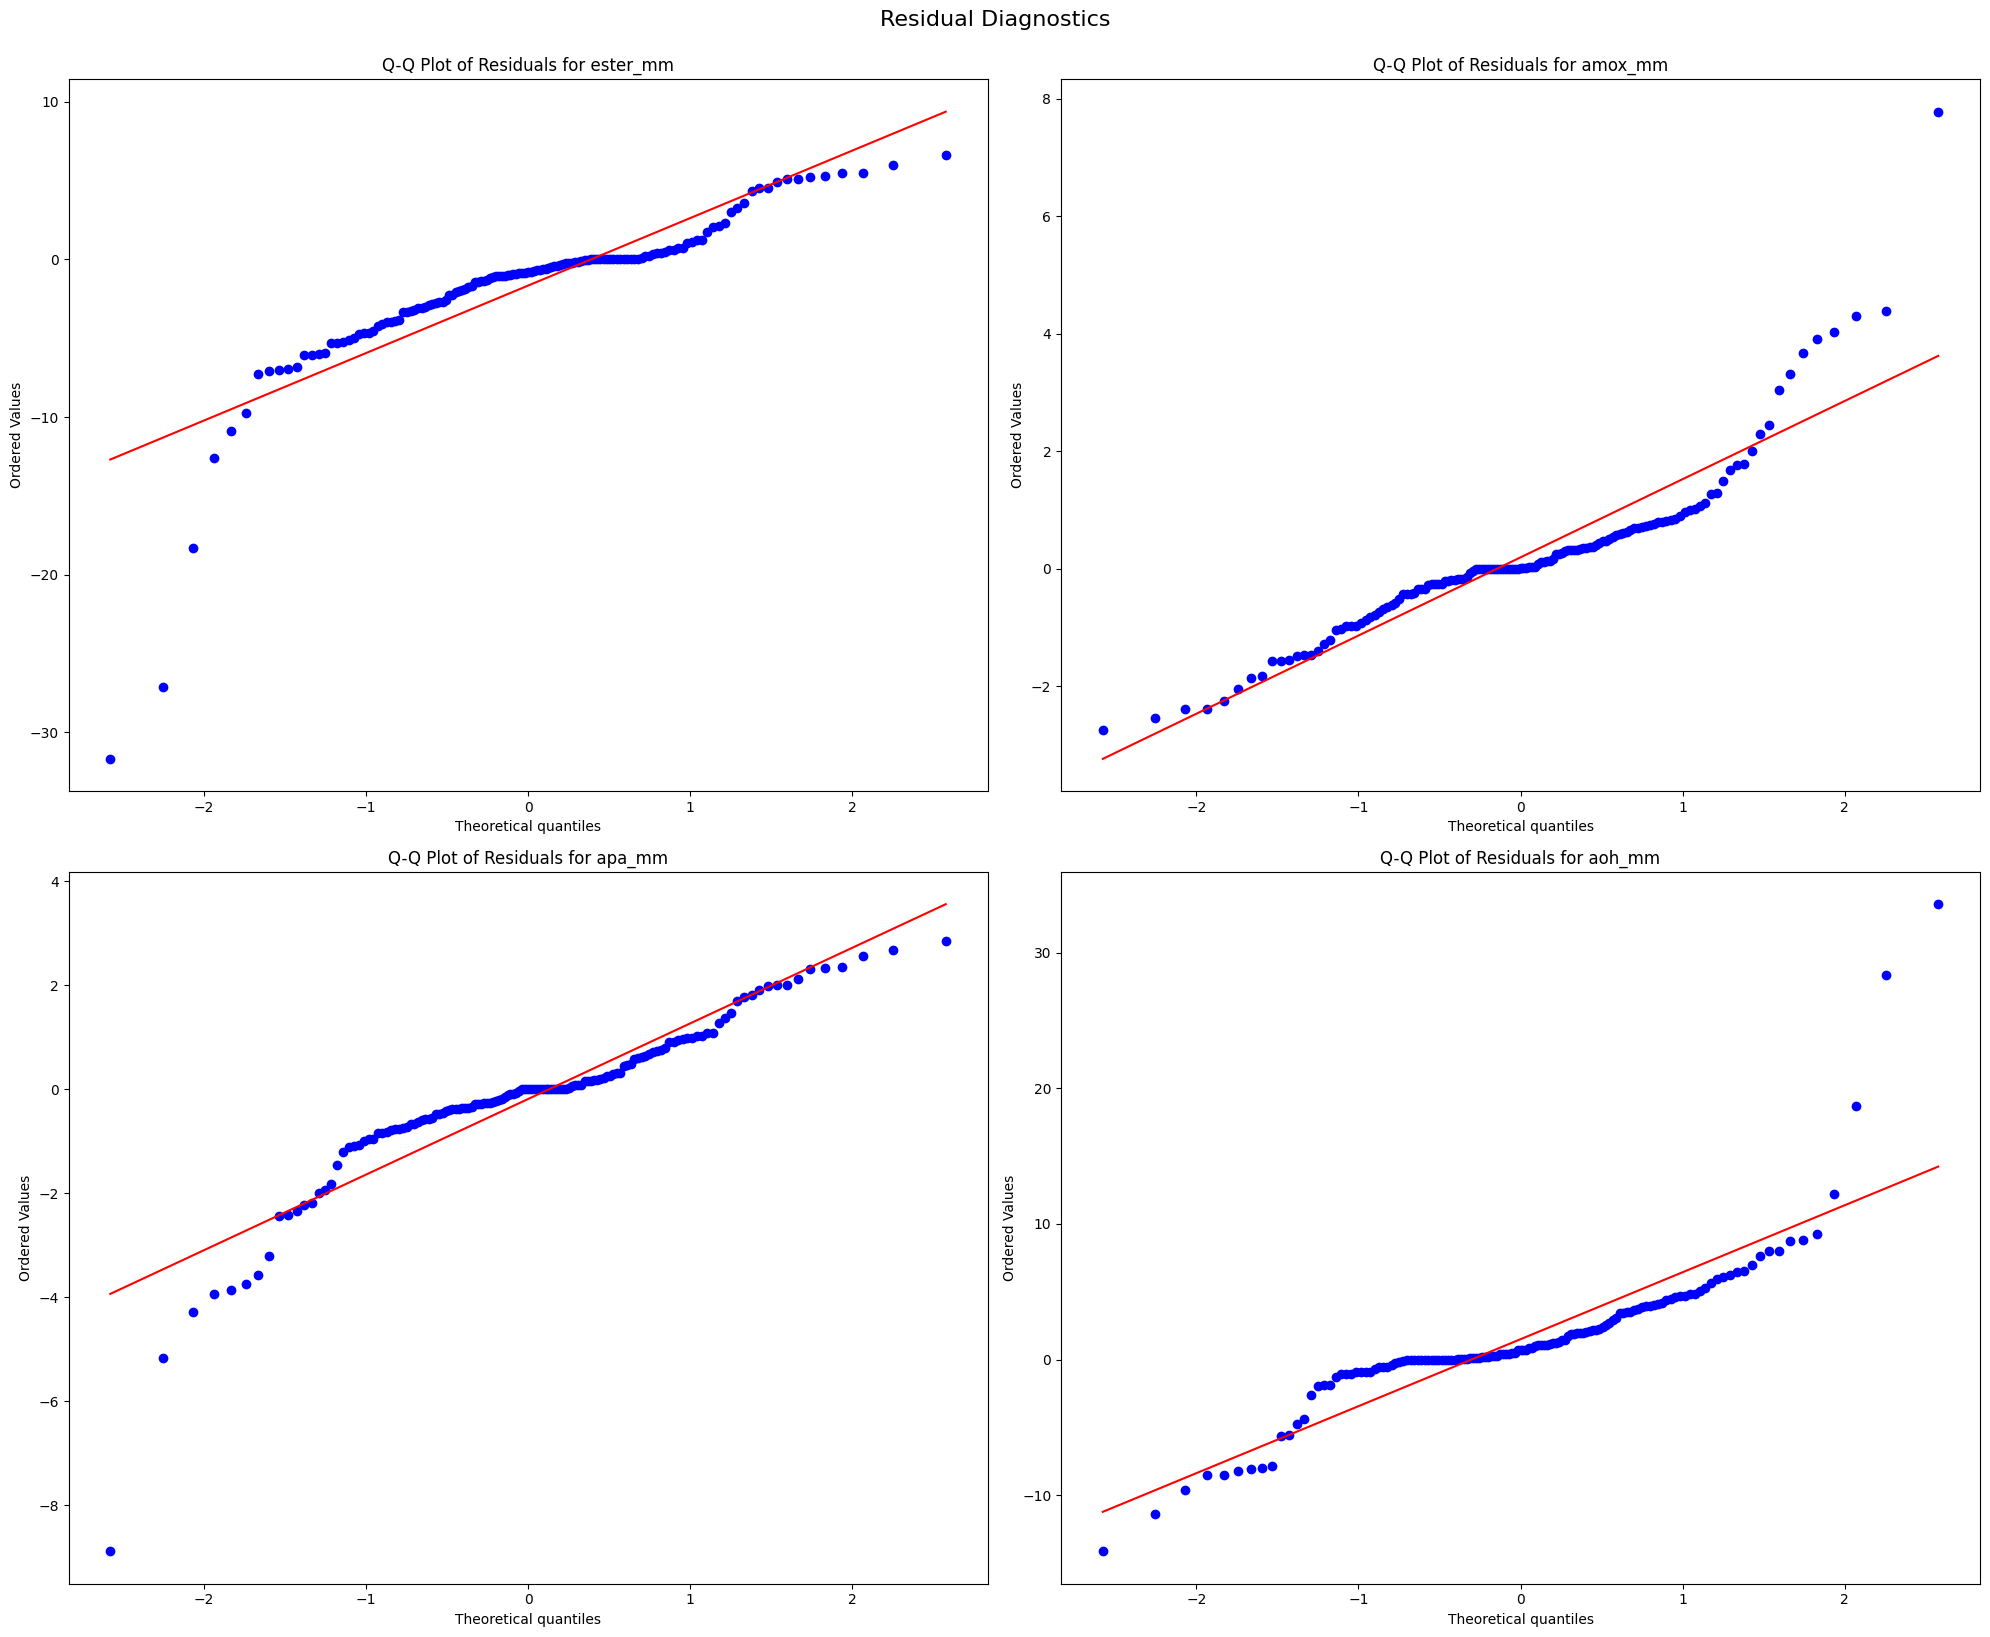

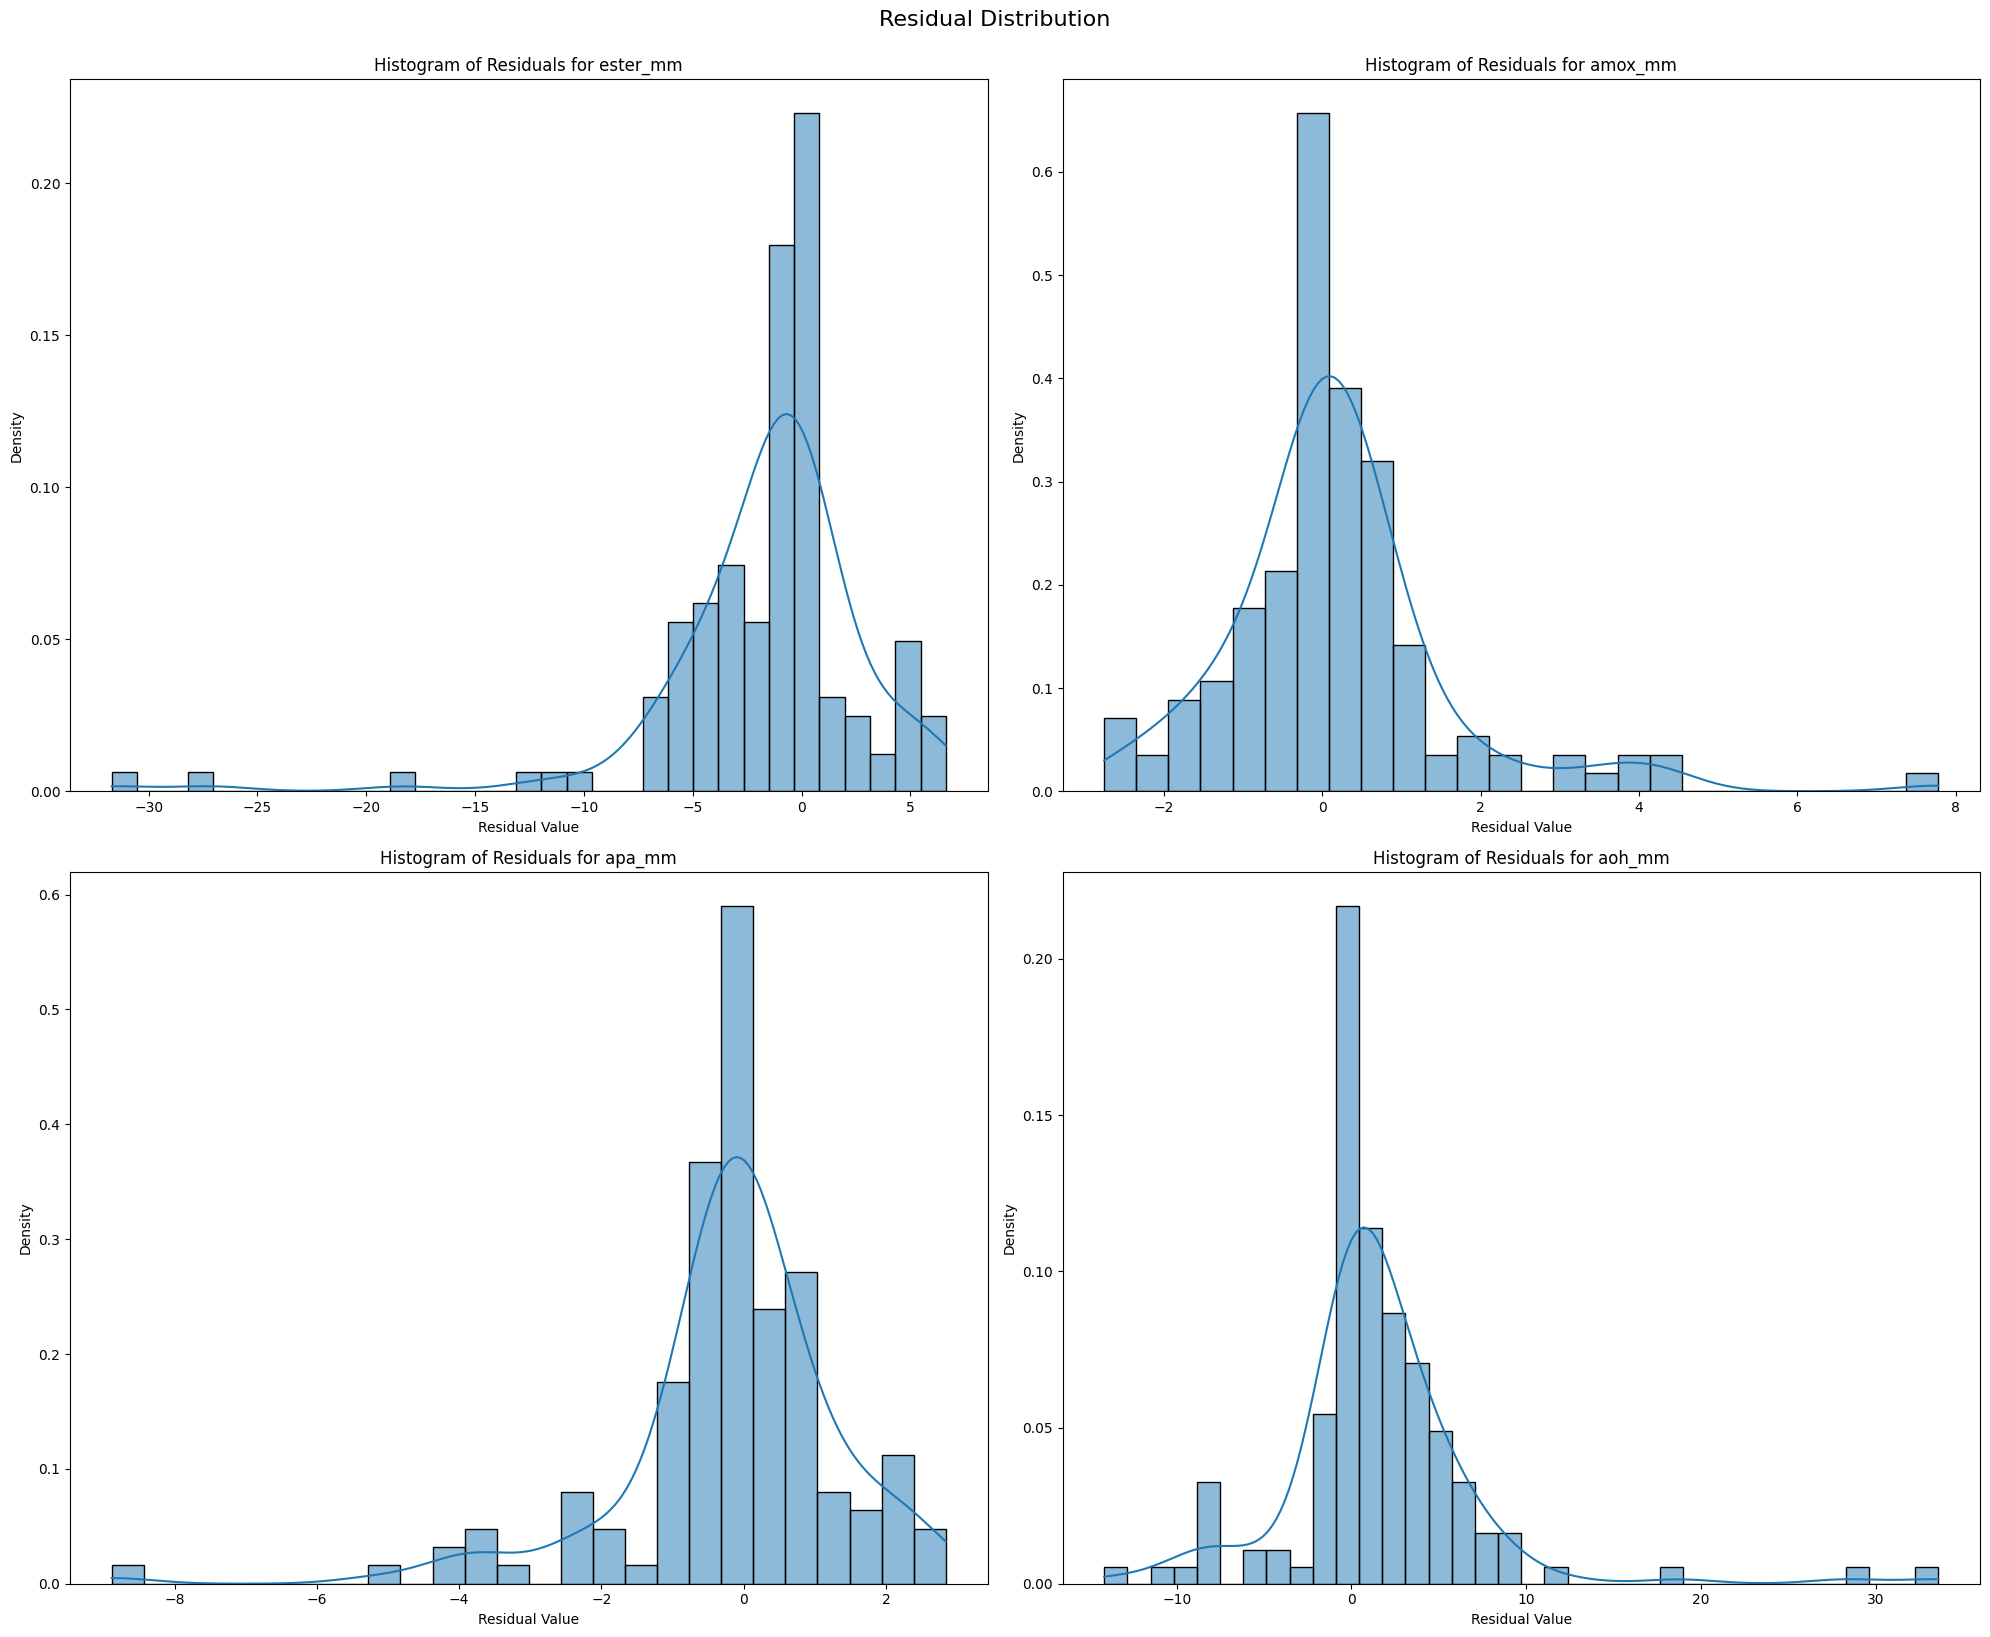

In [23]:
residual_results = detailed_residual_analysis(
    luci_best_P, 
    luci_model, 
    eval_set, 
    data_frames
)

# Print out comprehensive normality analysis results
for var_name, test_results in residual_results['normality_tests'].items():
    print(f"\nNormality Analysis for {var_name}:")
    
    # Shapiro-Wilk Test
    print("\nShapiro-Wilk Test:")
    print(f"Statistic: {test_results['shapiro_wilk']['statistic']:.4f}")
    print(f"P-value: {test_results['shapiro_wilk']['p_value']:.4f}")
    print(f"Normally distributed: {test_results['shapiro_wilk']['is_normal']}")
    
    # Anderson-Darling Test
    print("\nAnderson-Darling Test:")
    print(f"Statistic: {test_results['anderson_darling']['statistic']:.4f}")
    print("Critical Values at different significance levels:")
    for level, crit_val in zip(test_results['anderson_darling']['significance_levels'], 
                                test_results['anderson_darling']['critical_values']):
        print(f"{level}%: {crit_val:.4f}")
    print(f"Normally distributed: {test_results['anderson_darling']['is_normal']}")
    
    # Kolmogorov-Smirnov Test
    print("\nKolmogorov-Smirnov Test:")
    print(f"Statistic: {test_results['kolmogorov_smirnov']['statistic']:.4f}")
    print(f"P-value: {test_results['kolmogorov_smirnov']['p_value']:.4f}")
    print(f"Normally distributed: {test_results['kolmogorov_smirnov']['is_normal']}")
    
    # Descriptive Statistics
    print("\nDescriptive Statistics:")
    for stat_name, stat_value in test_results['descriptive_stats'].items():
        print(f"{stat_name.capitalize()}: {stat_value:.4f}")


In [24]:
def normalize_time(timestamps):
    """
    Normalize timestamps to [0, 1] range
    
    Parameters:
    -----------
    timestamps : numpy.ndarray
        Original timestamps from an experiment
    
    Returns:
    --------
    numpy.ndarray
        Normalized timestamps
    """
    if len(timestamps) <= 1:
        return timestamps
    
    # Linear min-max normalization
    min_time = timestamps.min()
    max_time = timestamps.max()
    
    # Prevent division by zero
    if min_time == max_time:
        return np.zeros_like(timestamps)
    
    return (timestamps - min_time) / (max_time - min_time)

def time_based_residual_analysis(P, model, eval_set, data_frames):
    """
    Perform comprehensive time-based residual analysis for the chemical model with normalized time
    
    Parameters:
    -----------
    P : numpy.ndarray
        Parameter set
    model : function
        ODE model function
    eval_set : list
        List of experiment names to evaluate
    data_frames : dict
        Dictionary of experimental dataframes
    
    Returns:
    --------
    dict containing time-based residual analysis results
    """
    # Output names
    x_names = ['ester_mm', 'amox_mm', 'apa_mm', 'aoh_mm']
    
    # Prepare results storage
    time_residual_analysis = {
        'time_residuals': {},
        'autocorrelation': {},
        'normalization_info': {}
    }
    
    # Create figures for various plots
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    axes = axes.flatten()
    
    # Iterate through each output variable
    for idx, var_name in enumerate(x_names):
        # Prepare lists for time-based analysis
        time_series_residuals = []
        time_series_timestamps = []
        
        # Store normalization information for each experiment
        exp_normalization_info = {}
        
        # Iterate through experiments
        for exp_name in eval_set:
            # Get target data
            x_target = data_frames[exp_name].loc[:, x_names].to_numpy()
            t_target = data_frames[exp_name]['apa_t'].to_numpy()
            
            # Initial conditions
            ic = x_target[0]
            
            # Model simulation
            sol_val = ode15s_amox(P, ic, t_target, model)
            x_model = sol_val
            
            # Residuals for this specific variable
            residuals = abs(x_target[:, idx] - x_model[:, idx])
            
            # Normalize time for this experiment
            normalized_t_target = normalize_time(t_target)
            
            # Store normalization information
            exp_normalization_info[exp_name] = {
                'original_min': t_target.min(),
                'original_max': t_target.max()
            }
            
            # Collect time series data
            time_series_residuals.extend(residuals)
            time_series_timestamps.extend(normalized_t_target)
        
        # Convert to numpy arrays
        time_series_residuals = np.array(time_series_residuals)
        time_series_timestamps = np.array(time_series_timestamps)
        
        # Sort by normalized timestamp to ensure chronological order
        sort_indices = np.argsort(time_series_timestamps)
        sorted_timestamps = time_series_timestamps[sort_indices]
        sorted_residuals = time_series_residuals[sort_indices]
        
        # Time Series Residual Plot
        axes[idx].scatter(sorted_timestamps, sorted_residuals, alpha=0.6)
        axes[idx].set_title(f'Normalized Residuals over Time for {var_name}')
        axes[idx].set_xlabel('Normalized Time')
        axes[idx].set_ylabel('Residuals')
        axes[idx].axhline(y=0, color='r', linestyle='--')
        
        # Calculate and plot moving average of residuals
        window_size = max(5, len(sorted_residuals) // 10)  # Adaptive window size
        moving_avg = np.convolve(sorted_residuals, np.ones(window_size)/window_size, mode='valid')
        moving_avg_timestamps = sorted_timestamps[window_size-1:]
        #axes[idx].plot(moving_avg_timestamps, moving_avg, color='green', linewidth=2, label='Moving Average')
        
        # Store time-based residual analysis results
        time_residual_analysis['time_residuals'][var_name] = {
            'timestamps': sorted_timestamps,
            'residuals': sorted_residuals
        }
        
        # Store normalization information
        time_residual_analysis['normalization_info'][var_name] = exp_normalization_info
        
        # Autocorrelation Analysis
        max_lag = min(50, len(sorted_residuals) // 2)
        autocorr = [np.corrcoef(sorted_residuals[:-i], sorted_residuals[i:])[0,1] 
                    for i in range(1, max_lag+1)]
        
        time_residual_analysis['autocorrelation'][var_name] = {
            'lags': list(range(1, max_lag+1)),
            'values': autocorr
        }
    
    # Adjust layout for first plot
    plt.tight_layout()
    plt.suptitle('Normalized Time-Based Residual Analysis', fontsize=16, y=1.02)
    
    # Create Autocorrelation Plot
    fig_autocorr, axes_autocorr = plt.subplots(2, 2, figsize=(20, 16))
    axes_autocorr = axes_autocorr.flatten()
    
    # Plot Autocorrelation for each variable
    for idx, var_name in enumerate(x_names):
        autocorr_data = time_residual_analysis['autocorrelation'][var_name]
        axes_autocorr[idx].bar(autocorr_data['lags'], autocorr_data['values'])
        axes_autocorr[idx].set_title(f'Autocorrelation of Residuals for {var_name}')
        axes_autocorr[idx].set_xlabel('Lag')
        axes_autocorr[idx].set_ylabel('Autocorrelation')
        axes_autocorr[idx].axhline(y=0, color='r', linestyle='--')
        
        # Add confidence interval lines
        n = len(autocorr_data['values'])
        confidence_interval = 1.96 / np.sqrt(n)
        axes_autocorr[idx].axhline(y=confidence_interval, color='g', linestyle='--')
        axes_autocorr[idx].axhline(y=-confidence_interval, color='g', linestyle='--')
    
    plt.tight_layout()
    plt.suptitle('Autocorrelation of Residuals', fontsize=16, y=1.02)
    
    # Create Residual Distribution over Normalized Time
    fig_dist, axes_dist = plt.subplots(2, 2, figsize=(20, 16))
    axes_dist = axes_dist.flatten()
    
    for idx, var_name in enumerate(x_names):
        time_data = time_residual_analysis['time_residuals'][var_name]
        
        # Create a heatmap-like visualization of residuals over normalized time
        # Bin the timestamps and residuals
        time_bins = np.linspace(0, 1, 20)  # Normalized time is always [0, 1]
        residual_bins = np.linspace(time_data['residuals'].min(), time_data['residuals'].max(), 20)
        
        # Use 2D histogram to show residual distribution changes over time
        h, x_edges, y_edges = np.histogram2d(
            time_data['timestamps'], 
            time_data['residuals'], 
            bins=[time_bins, residual_bins]
        )
        
        # Plot heatmap
        im = axes_dist[idx].imshow(
            h.T, 
            aspect='auto', 
            origin='lower', 
            extent=[0, 1, y_edges[0], y_edges[-1]],
            cmap='viridis'
        )
        axes_dist[idx].set_title(f'Residual Distribution over Normalized Time for {var_name}')
        axes_dist[idx].set_xlabel('Normalized Time')
        axes_dist[idx].set_ylabel('Residual Value')
        plt.colorbar(im, ax=axes_dist[idx], label='Frequency')
    
    plt.tight_layout()
    plt.suptitle('Residual Distribution over Normalized Time', fontsize=16, y=1.02)
    
    return time_residual_analysis


Time-Based Residual Analysis for ester_mm:
Total number of residuals: 139
Time range: 0.0000 to 1.0000
Mean residual: 2.9593
Residual standard deviation: 4.2449
Significant autocorrelation at lags: [1, 5, 10, 11, 16, 17, 20, 21, 25, 27, 32, 36, 37, 43, 45, 48]

Time-Based Residual Analysis for amox_mm:
Total number of residuals: 139
Time range: 0.0000 to 1.0000
Mean residual: 0.8979
Residual standard deviation: 1.1100
Significant autocorrelation at lags: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 48, 49, 50]

Time-Based Residual Analysis for apa_mm:
Total number of residuals: 139
Time range: 0.0000 to 1.0000
Mean residual: 0.9797
Residual standard deviation: 1.2138
Significant autocorrelation at lags: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43,

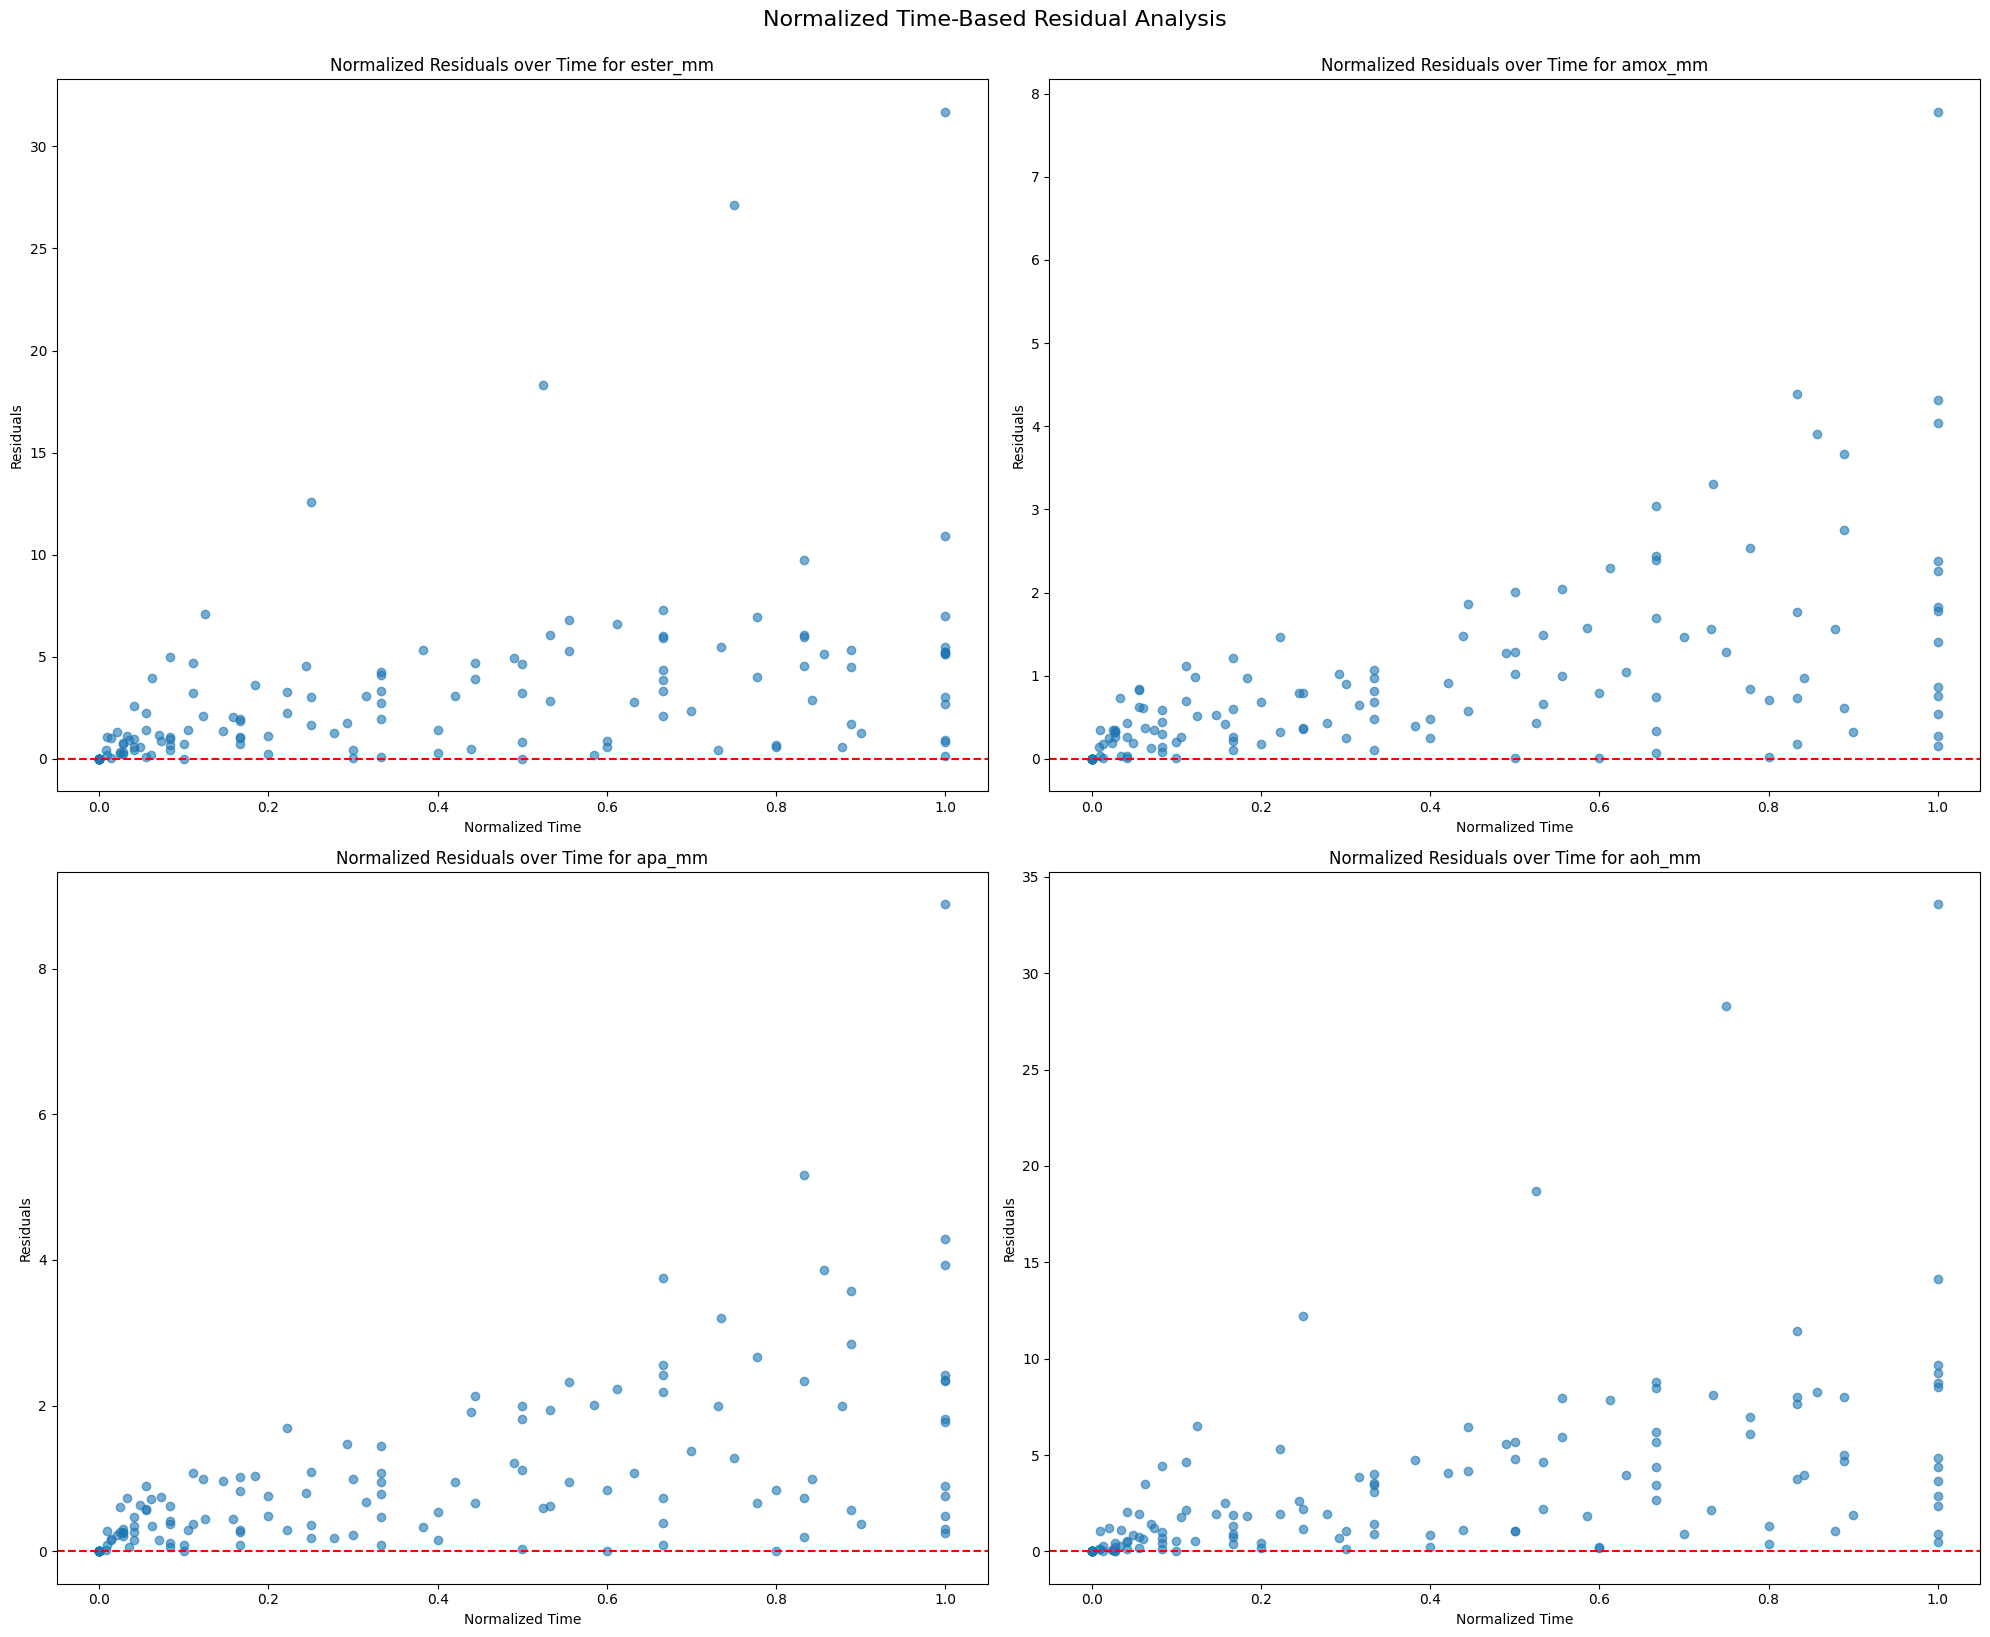

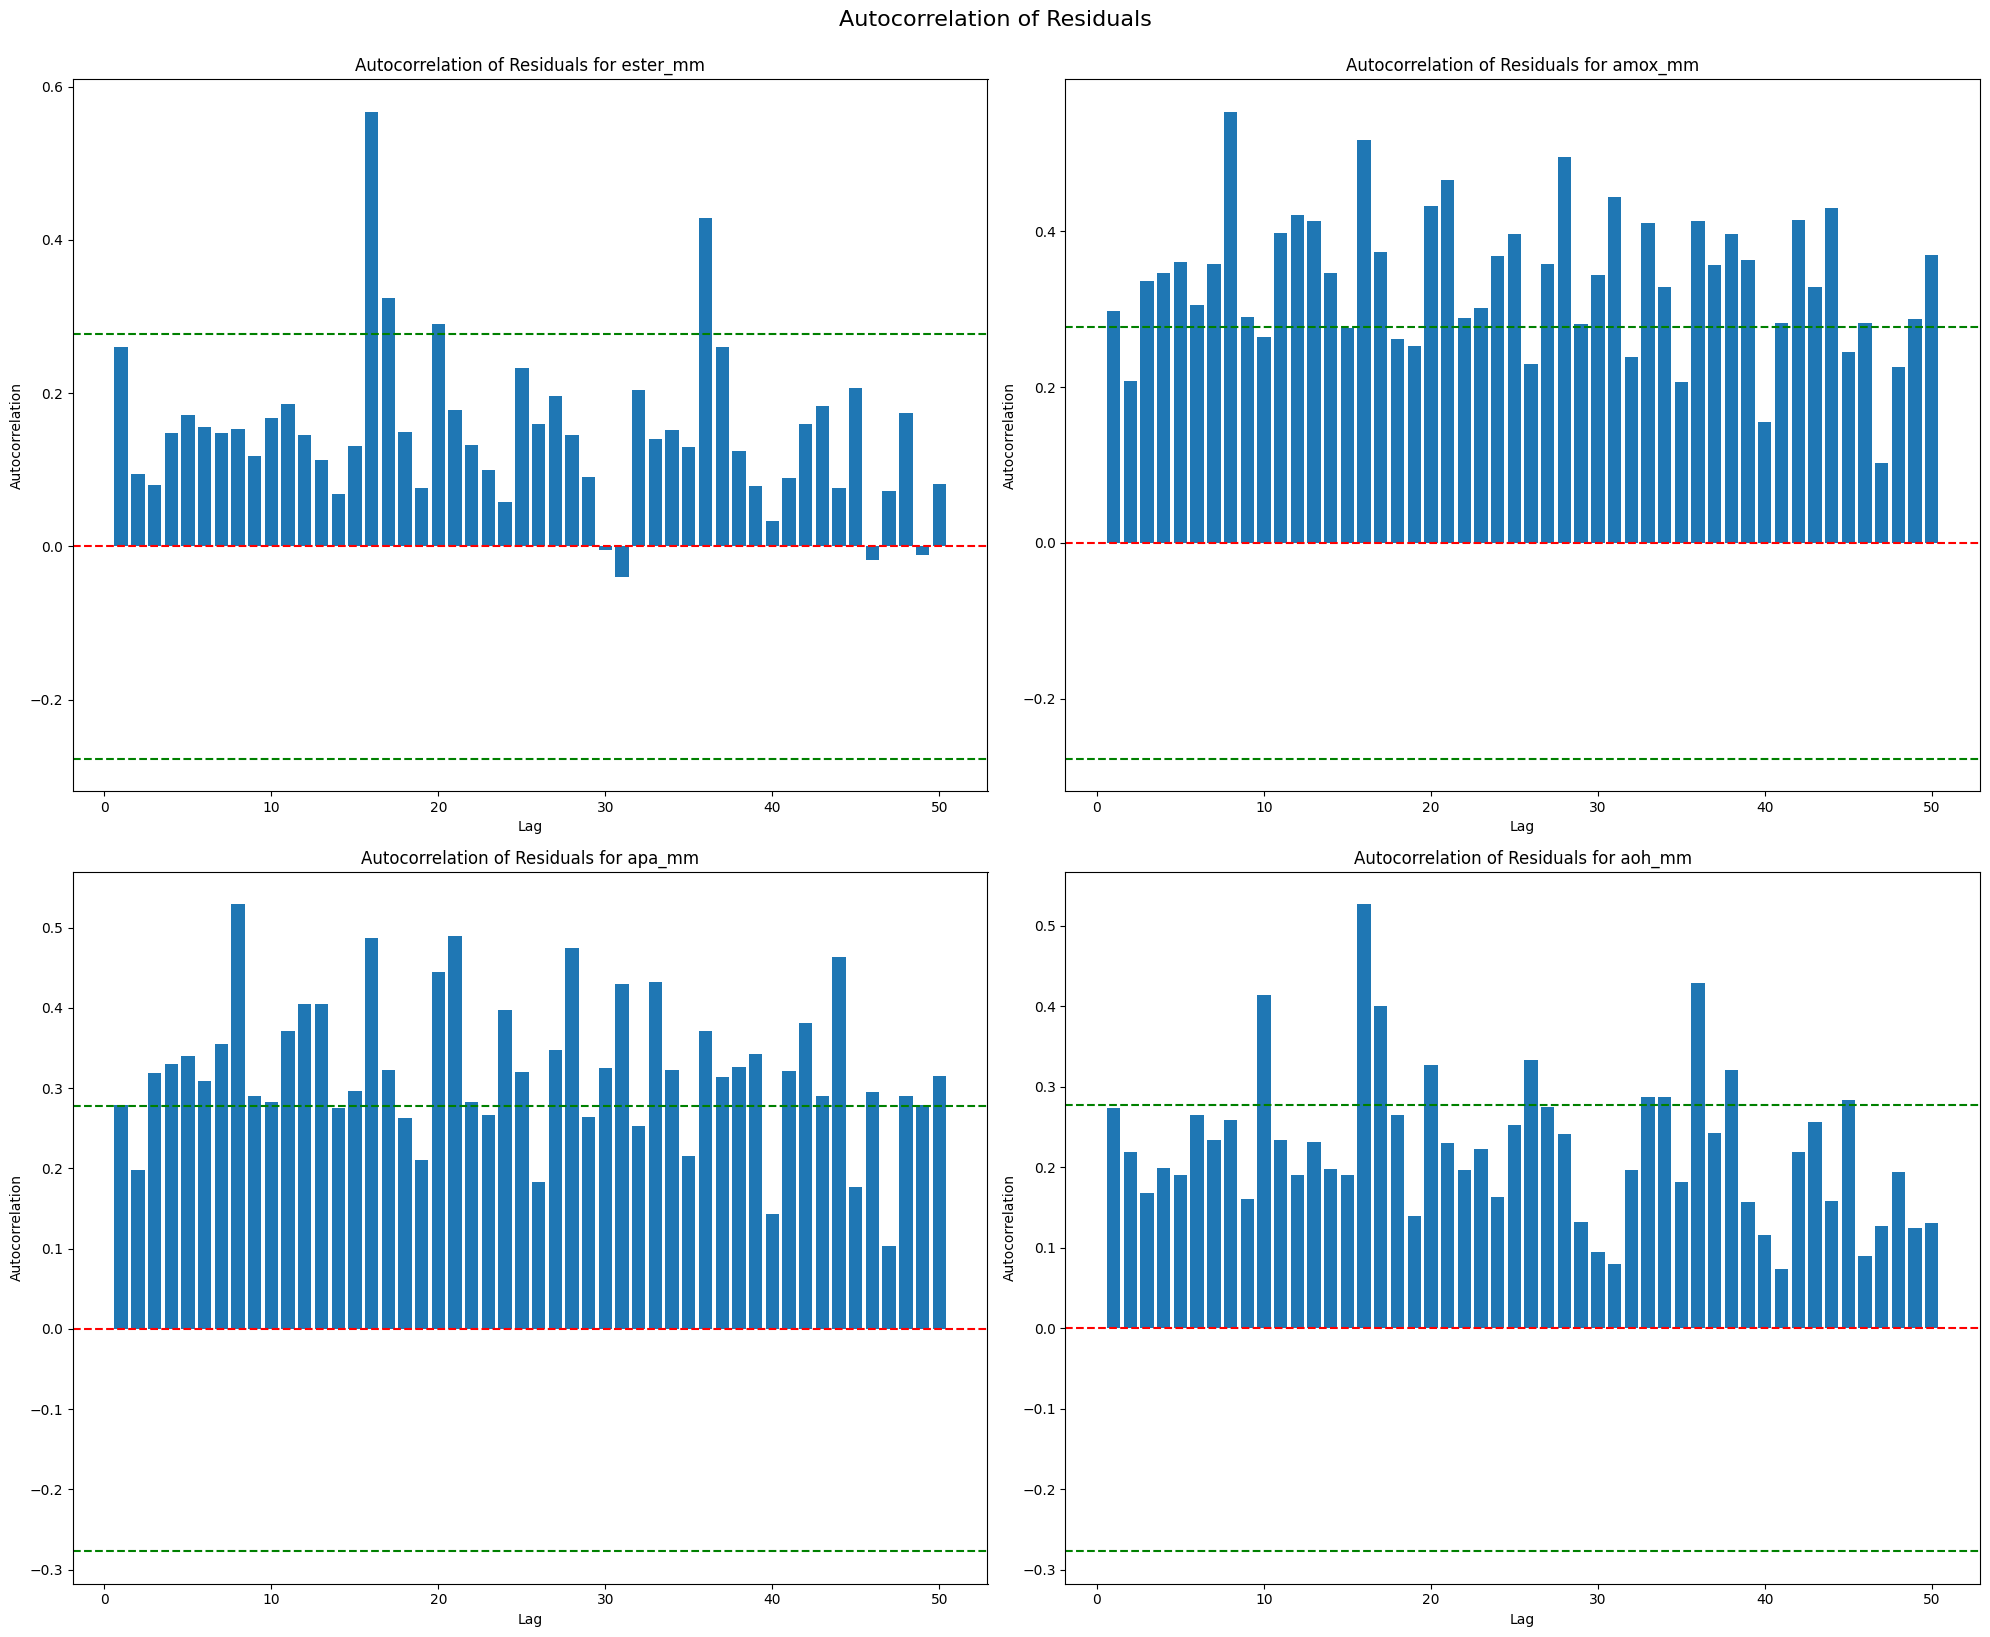

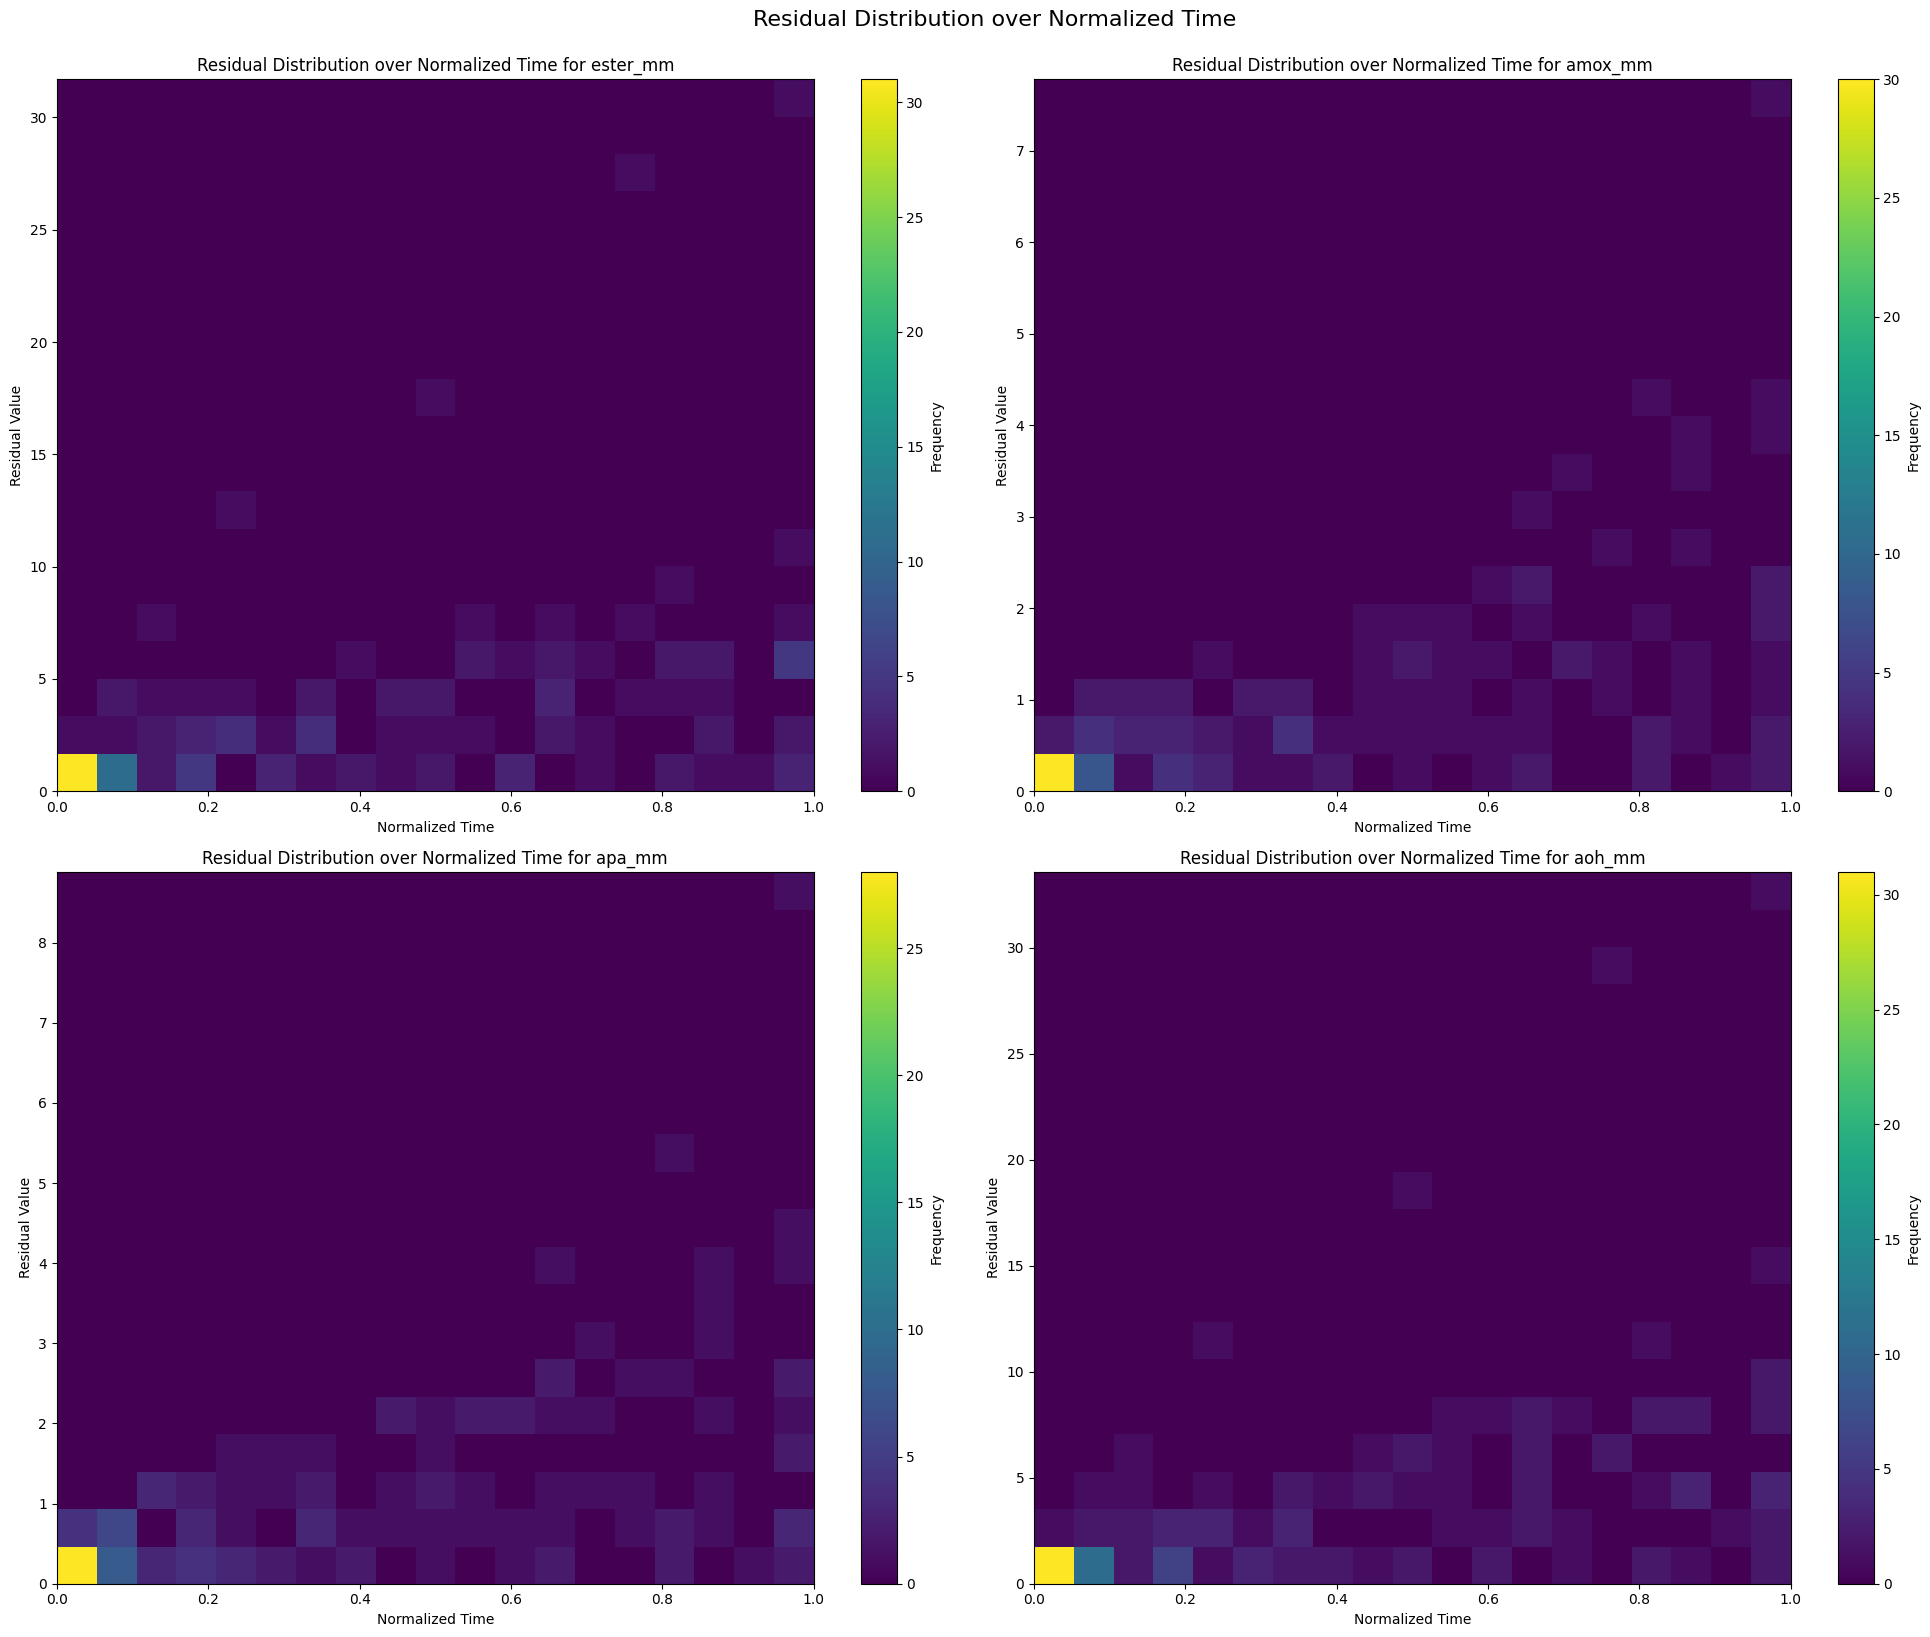

In [25]:
# Perform time-based residual analysis
time_residual_results = time_based_residual_analysis(
    luci_best_P, 
    luci_model, 
    eval_set, 
    data_frames
)

# Print out summary of time-based residual analysis
for var_name in time_residual_results['time_residuals']:
    print(f"\nTime-Based Residual Analysis for {var_name}:")
    residuals = time_residual_results['time_residuals'][var_name]['residuals']
    timestamps = time_residual_results['time_residuals'][var_name]['timestamps']
    
    print(f"Total number of residuals: {len(residuals)}")
    print(f"Time range: {timestamps.min():.4f} to {timestamps.max():.4f}")
    print(f"Mean residual: {np.mean(residuals):.4f}")
    print(f"Residual standard deviation: {np.std(residuals):.4f}")
    
    # Check for temporal patterns in residuals
    autocorr = time_residual_results['autocorrelation'][var_name]
    significant_lags = [lag for lag, corr in zip(autocorr['lags'], autocorr['values']) 
                            if abs(corr) > 1.96 / np.sqrt(len(residuals))]
    
    if significant_lags:
        print("Significant autocorrelation at lags:", significant_lags)
    else:
        print("No significant autocorrelation detected")

<function luci_model at 0x000001A24BF709A0> [ 0.15294611  0.19756212 11.81620907  2.68317695  0.76054519  6.73168949
 16.15340786]
<function mcd_model at 0x000001A24BA2FF60> [1.58571962e+00 7.18357883e-01 5.48438149e-01 4.07024180e+02
 6.40605069e+01 3.83734232e+01 3.10419318e-01]
<function luci_model at 0x000001A24BF709A0> [ 0.178  0.327  7.905 12.509  0.606 14.35  10.907]
<function mcd_model at 0x000001A24BA2FF60> [  3.11666667   0.73333333   3.91666667 380.          95.
  43.           3.61666667]


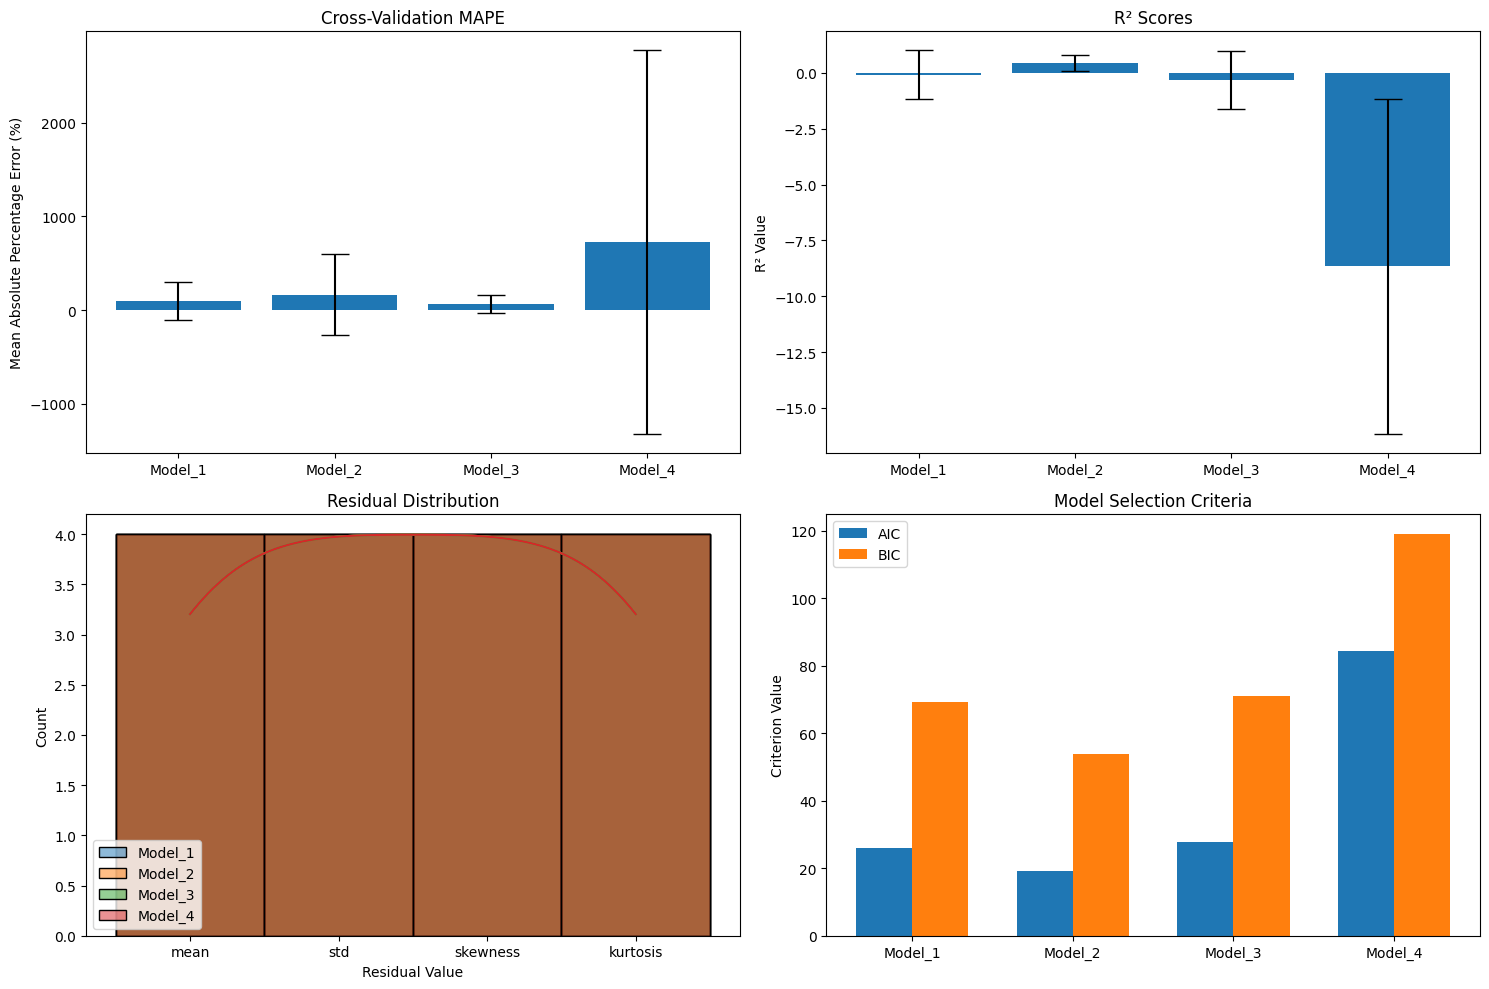


Model_1 Performance:
Mean Prediction Error (MAPE): 95.92% ± 206.40%
R² (Training): -0.072

Model_2 Performance:
Mean Prediction Error (MAPE): 166.26% ± 436.45%
R² (Training): 0.450

Model_3 Performance:
Mean Prediction Error (MAPE): 68.03% ± 96.94%
R² (Training): -0.333

Model_4 Performance:
Mean Prediction Error (MAPE): 726.12% ± 2046.53%
R² (Training): -8.659

Model Selection Criteria:
Model_1:
AIC: 26.1
BIC: 69.3
Number of Parameters: 10
Model_2:
AIC: 19.2
BIC: 53.8
Number of Parameters: 8
Model_3:
AIC: 27.9
BIC: 71.1
Number of Parameters: 10
Model_4:
AIC: 84.4
BIC: 118.9
Number of Parameters: 8


In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from scipy.integrate import solve_ivp

class ModelComparator:
    def __init__(self, models, parameter_sets, data_frames, eval_set, solver_function):
        """
        Initialize the Model Comparator
        
        Parameters:
        -----------
        models : list
            List of model functions [model1, model2]
        parameter_sets : list
            List of corresponding parameter sets [P1, P2]
        data_frames : dict
            Dictionary of experimental dataframes
        eval_set : list
            List of experiment names for evaluation
        solver_function : function
            A solver function to solve the ODEs
        """
        self.models = models
        self.parameter_sets = parameter_sets
        self.data_frames = data_frames
        self.eval_set = eval_set
        self.solver_function = solver_function  # Store solver function
        
        # Output variables (assuming these based on previous context)
        self.x_names = ['ester_mm', 'amox_mm', 'apa_mm', 'aoh_mm']
    
    def calculate_autocorrelation(self, residuals, max_lag=20):
        """
        Calculate autocorrelation for residuals
        
        Parameters:
        -----------
        residuals : dict
            Dictionary of residuals for each variable
        max_lag : int, optional
            Maximum lag to calculate autocorrelation
        
        Returns:
        --------
        dict of autocorrelation results
        """
        autocorr_results = {}
        
        for var_name, var_residuals in residuals.items():
            var_residuals = np.array(var_residuals)
            
            # Calculate autocorrelation
            autocorr = [np.corrcoef(var_residuals[:-i], var_residuals[i:])[0,1] 
                        for i in range(1, min(max_lag, len(var_residuals)//2))]
            
            autocorr_results[var_name] = {
                'lags': list(range(1, len(autocorr) + 1)),
                'values': autocorr
            }
        
        return autocorr_results

    def calculate_cross_validation_metrics(self):
        """
        Calculate cross-validation performance metrics for both models
        with variable-length experiment data
        
        Returns:
        --------
        dict of performance metrics
        """
        performance_metrics = {}
        
        for model_idx, (model, P) in enumerate(zip(self.models, self.parameter_sets), 1):
            print(model,P)
            # Prepare lists to collect metrics
            mape_values = []
            r2_train_values = []
            r2_val_values = []
            
            # Iterate through experiments
            for exp_name in self.eval_set:
                # Get target data
                x_target = self.data_frames[exp_name].loc[:, self.x_names].to_numpy()
                t_target = self.data_frames[exp_name]['apa_t'].to_numpy()
                
                # Initial conditions (first row of x_target)
                ic = x_target[0]
                
                # Model simulation using the external solver function
                sol_val = self.solver_function(P, ic, t_target, model)  # Call external solver function

                # Calculate metrics for each output variable
                model_mape_values = []
                model_r2_train_values = []
                model_r2_val_values = []
                
                for idx, var_name in enumerate(self.x_names):
                    # MAPE (Mean Absolute Percentage Error)
                    mape = mean_absolute_percentage_error(x_target[:, idx], sol_val[:, idx]) * 100
                    model_mape_values.append(mape)
                    
                    # R² for training (assuming the whole dataset for each experiment)
                    r2_train = r2_score(x_target[:, idx], sol_val[:, idx])
                    model_r2_train_values.append(r2_train)
                
                # Aggregate metrics for this experiment
                mape_values.append(np.mean(model_mape_values))
                r2_train_values.append(np.mean(model_r2_train_values))
            
            # Store aggregated performance metrics for this model
            performance_metrics[f'Model_{model_idx}'] = {
                'MAPE': {
                    'mean': np.mean(mape_values),
                    'std': np.std(mape_values)
                },
                'R2_train': {
                    'mean': np.mean(r2_train_values),
                    'std': np.std(r2_train_values)
                }
            }
        
        return performance_metrics
    
    def residual_analysis(self):
        """
        Perform comprehensive residual analysis for both models
        
        Returns:
        --------
        dict of residual analysis results
        """
        residual_analysis_results = {}
        
        for model_idx, (model, P) in enumerate(zip(self.models, self.parameter_sets), 1):
            # Prepare results storage for this model
            model_residuals = {var: [] for var in self.x_names}
            
            # Iterate through experiments
            for exp_name in self.eval_set:
                # Get target data
                x_target = self.data_frames[exp_name].loc[:, self.x_names].to_numpy()
                t_target = self.data_frames[exp_name]['apa_t'].to_numpy()
                
                # Initial conditions
                ic = x_target[0]
                
                # Model simulation
                sol_val = self.solver_function(P, ic, t_target, model)
                
                # Calculate residuals for each variable
                for idx, var_name in enumerate(self.x_names):
                    residuals = x_target[:, idx] - sol_val[:, idx]
                    model_residuals[var_name].extend(residuals)
            
            # Compile residual analysis for this model
            residual_analysis_results[f'Model_{model_idx}'] = {}
            
            for var_name, residuals in model_residuals.items():
                residuals = np.array(residuals)
                
                # Residual distribution characteristics
                residual_analysis_results[f'Model_{model_idx}'][var_name] = {
                    'mean': np.mean(residuals),
                    'std': np.std(residuals),
                    'skewness': stats.skew(residuals),
                    'kurtosis': stats.kurtosis(residuals)
                }
            
            # Autocorrelation analysis
            residual_analysis_results[f'Model_{model_idx}']['autocorrelation'] = \
                self.calculate_autocorrelation(model_residuals)
        
        return residual_analysis_results

        

    def calculate_model_selection_criteria(self):
        """
        Calculate Akaike Information Criterion (AIC) and 
        Bayesian Information Criterion (BIC)
        
        Returns:
        --------
        dict of model selection criteria
        """
        model_criteria = {}
        
        for model_idx, (model, P) in enumerate(zip(self.models, self.parameter_sets), 1):
            # Prepare variables to track
            total_residual_sum_sq = 0
            total_observations = 0
            
            # Iterate through experiments in eval_set
            for exp_name in self.eval_set:
                # Get target data (measured data)
                x_target = self.data_frames[exp_name].loc[:, self.x_names].to_numpy()
                t_target = self.data_frames[exp_name]['apa_t'].to_numpy()
                
                # Reference data for deviation calculation
                CAB_ref = self.data_frames[exp_name]['ester_mm'].to_numpy()
                CAN_ref = self.data_frames[exp_name]['amox_mm'].to_numpy()
                CNH_ref = self.data_frames[exp_name]['apa_mm'].to_numpy()
                CAOH_ref = self.data_frames[exp_name]['aoh_mm'].to_numpy()
                
                # Calculate deviations (standard deviations approximated as 10% of the max value)
                desvio_CAB = 0.1 * max(CAB_ref)
                desvio_CAN = 0.1 * max(CAN_ref)
                desvio_CNH = 0.1 * max(CNH_ref)
                desvio_CAOH = 0.1 * max(CAOH_ref)
                
                # Initial conditions (use the first entry as initial conditions)
                ic = x_target[0]
                
                # Simulate the model using the solver function
                sol_val = self.solver_function(P, ic, t_target, model)
                
                # Calculate residuals and accumulate sum of squares
                for idx in range(len(self.x_names)):
                    residuals = x_target[:, idx] - sol_val[:, idx]
                    
                    # Apply the deviations to scale the residuals
                    if idx == 0:  # CAB
                        residuals /= desvio_CAB
                    elif idx == 1:  # CAN
                        residuals /= desvio_CAN
                    elif idx == 2:  # CNH
                        residuals /= desvio_CNH
                    elif idx == 3:  # CAOH
                        residuals /= desvio_CAOH
                    
                    total_residual_sum_sq += np.sum(residuals**2)
                    total_observations += len(residuals)
            
            # Number of parameters (length of parameter vector)
            if model == mcd_model:
                    num_params = 8
            else:
                    num_params = 10
            
            # Calculate the likelihood using residual sum of squares as a proxy
            # L = exp(-0.5 * (RSS / sigma^2)), where RSS is residual sum of squares and sigma^2 is the variance
            # Use the residual sum of squares divided by the number of observations to approximate sigma^2
            rss_per_observation = total_residual_sum_sq / total_observations
            likelihood = np.exp(-0.5 * rss_per_observation)
            
            # AIC = 2k - 2ln(L), where k is the number of parameters and L is the likelihood
            aic = 2 * num_params - 2 * np.log(likelihood)
            
            # BIC = k * ln(n) - 2ln(L), where k is the number of parameters, n is the number of observations, and L is the likelihood
            bic = num_params * np.log(total_observations) - 2 * np.log(likelihood)
            
            # Store model criteria
            model_criteria[f'Model_{model_idx}'] = {
                'AIC': aic,
                'BIC': bic,
                'num_parameters': num_params
            }
        
        return model_criteria


    def visualize_results(self, cross_val_metrics, residual_analysis, model_criteria):
        """
        Create comprehensive visualization of model comparison results
        """
        # Create figure for performance metrics
        plt.figure(figsize=(15, 10))
        
        # Cross-Validation Performance Subplot
        plt.subplot(2, 2, 1)
        model_names = list(cross_val_metrics.keys())
        mape_means = [cross_val_metrics[model]['MAPE']['mean'] for model in model_names]
        mape_stds = [cross_val_metrics[model]['MAPE']['std'] for model in model_names]
        plt.bar(model_names, mape_means, yerr=mape_stds, capsize=10)
        plt.title('Cross-Validation MAPE')
        plt.ylabel('Mean Absolute Percentage Error (%)')
        
        # R² Subplot
        plt.subplot(2, 2, 2)
        r2_means = [cross_val_metrics[model]['R2_train']['mean'] for model in model_names]
        r2_stds = [cross_val_metrics[model]['R2_train']['std'] for model in model_names]
        plt.bar(model_names, r2_means, yerr=r2_stds, capsize=10)
        plt.title('R² Scores')
        plt.ylabel('R² Value')
        
        # Residual Distribution Subplot
        plt.subplot(2, 2, 3)
        for model in model_names:
            # Collect residuals across all variables
            all_residuals = []
            for var_name in self.x_names:
                all_residuals.extend(residual_analysis[model][var_name])
            
            sns.histplot(all_residuals, kde=True, label=model)
        plt.title('Residual Distribution')
        plt.xlabel('Residual Value')
        plt.legend()
        
        # Model Selection Criteria Subplot
        plt.subplot(2, 2, 4)
        aic_values = [model_criteria[model]['AIC'] for model in model_names]
        bic_values = [model_criteria[model]['BIC'] for model in model_names]
        width = 0.35
        x = np.arange(len(model_names))
        plt.bar(x - width/2, aic_values, width, label='AIC')
        plt.bar(x + width/2, bic_values, width, label='BIC')
        plt.title('Model Selection Criteria')
        plt.ylabel('Criterion Value')
        plt.xticks(x, model_names)
        plt.legend()
        
        plt.tight_layout()
        plt.show()

    def run_comparative_analysis(self):
        """
        Run full comparative analysis using an external solver function
        
        Returns:
        --------
        dict of comprehensive analysis results
        """
        # Perform cross-validation
        cross_val_metrics = self.calculate_cross_validation_metrics()
        
        # Perform residual analysis
        residual_analysis = self.residual_analysis()
        
        # Calculate model selection criteria
        model_criteria = self.calculate_model_selection_criteria()
        
        # Visualize results
        self.visualize_results(cross_val_metrics, residual_analysis, model_criteria)
        
        # Compile comprehensive results
        comprehensive_results = {
            'cross_validation': cross_val_metrics,
            'residual_analysis': residual_analysis,
            'model_criteria': model_criteria
        }
        
        return comprehensive_results

    
# Create model comparator
comparator = ModelComparator(
    models=[luci_model, mcd_model,luci_model, mcd_model],
    parameter_sets=[luci_best_P,mcd_best_P,P_luci,P_mcd],
    data_frames=data_frames,
    eval_set=eval_set,
    solver_function=ode15s_amox 
)

# Run comparative analysis
results = comparator.run_comparative_analysis()

# Print detailed results
for model_name, metrics in results['cross_validation'].items():
    print(f"\n{model_name} Performance:")
    print(f"Mean Prediction Error (MAPE): {metrics['MAPE']['mean']:.2f}% ± {metrics['MAPE']['std']:.2f}%")
    print(f"R² (Training): {metrics['R2_train']['mean']:.3f}")
    
# Additional detailed output could be added here
print("\nModel Selection Criteria:")
for model_name, criteria in results['model_criteria'].items():
    print(f"{model_name}:")
    print(f"AIC: {criteria['AIC']:.1f}")
    print(f"BIC: {criteria['BIC']:.1f}")
    print(f"Number of Parameters: {criteria['num_parameters']}")